In [1]:
# Will start with depletion varion, maybe day 3 after he gets it. Look at all sessions, see where the CW/CWW is most strong. 
#think about a way to characterize. (ABCABCABC)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics
from scipy.optimize import curve_fit
import math 
from scipy.stats import binom
import seaborn as sns
from scipy import stats
import matplotlib.patches as mpatches
from scipy.stats import beta
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



In [4]:
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_depletion_data.csv')

In [5]:
# df

In [6]:
# df['stem_switch'] = df['stem'].ne(df['stem'].shift()) #T/F when he switches stems 
# df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['day']= df['date'].ne(df['date'].shift()).cumsum()
#df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())


df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift()).cumsum() #count from 1:222 for senor, eevry contingency numbered incremet

df['day_chng'] = df['day'].ne(df['day'].shift()) #T/F , first trial of new day T
df['stem_switch'] = df['stem'].ne(df['stem'].shift()) #T/F when he switches stems 
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        df.loc[ix,'stem_switch']= True
df['bout_num'] = df['stem'].ne(df['stem'].shift()).cumsum() #incremnts each bout 



# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
# for ix in range(len(df)): #find the global nominal average 
#     cont= str(df.loc[ix, 'contingency'])
#     cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
#     cont = [int(i) for i in cont]
#     df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
#     for counter in range(6):
#         df.loc[ix,f'leaf{counter+1}'] = cont[counter]
df['sess_chng'] = df['session'].ne(df['session'].shift()).cumsum()
obj = ['day', 'session', 'stem']

df['rew_count_session'] = df.groupby(obj)[['reward']].cumsum()
# obj1 = ['day', 'session', 'stem','cont_num']
# df[]
df[0:5]
obj1 = ['day', 'session']
df['rew_count_session_total'] = df.groupby(obj1)[['reward']].cumsum()



In [7]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,bout_num,sess_chng,rew_count_session,rew_count_session_total
0,0,4,B,1,805020802050,20201109,1,0,1,1,1,True,True,1,1,1,1
1,1,3,B,0,805020642050,20201109,1,1,1,2,2,False,False,1,1,1,1
2,2,4,B,1,805016642050,20201109,1,2,1,3,3,False,False,1,1,2,2
3,3,3,B,0,805016512050,20201109,1,3,1,4,4,False,False,1,1,2,2
4,4,4,B,0,805012512050,20201109,1,4,1,5,5,False,False,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,18421,False,False,4616,67,79,130
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,18422,False,False,4616,67,80,131
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,18423,False,False,4616,67,81,132
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,18424,False,False,4616,67,81,132


In [8]:
day3=df[df['day']==3]
sess=day3[day3['session']==1]

In [9]:
stemswitch= sess[sess['stem_switch']==1]

In [ ]:
stems = stemswitch['stem']
stems

In [11]:
RorL=[]
# If A->C or C->B or B->A, R
for ix in range(len(stems)):
    if ix<len(stems)-1:
        stem1=stems.iloc[ix]
        stem2 = stems.iloc[ix+1]
        if stem1=='A':
            if stem2=='B':
                RorL.append('L')
            elif stem2=='C':
                RorL.append('R')
        elif stem1=='B':
            if stem2=='C':
                RorL.append('L')
            elif stem2=='A':
                RorL.append('R')
        elif stem1=='C':
            if stem2=='A':
                RorL.append('L')
            elif stem2=='B':
                RorL.append('R')
#     print(stems.iloc[ix])

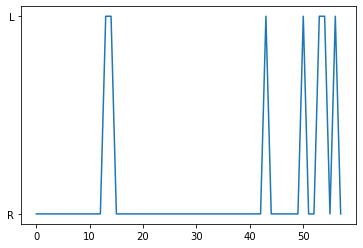

In [12]:
plt.plot(RorL)

In [13]:
print(stem1,stem2)

A C


In [14]:
ix

58

In [ ]:
#putting it all together, iterate through sessions. BAC = R
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        plt.figure()
        if len(sess)>0:
            stemswitch= sess[sess['stem_switch']==1]
            stems = stemswitch['stem']
            contin=sess.iloc[0]['contingency']
            RorL=[]
            
        # If A->C or C->B or B->A, R
            for ix in range(len(stems)):
                if ix<len(stems)-1:
                    stem1=stems.iloc[ix]
                    stem2 = stems.iloc[ix+1]
                    if stem1=='A':
                        if stem2=='B':
                            RorL.append('L')
                        elif stem2=='C':
                            RorL.append('R')
                    elif stem1=='B':
                        if stem2=='C':
                            RorL.append('L')
                        elif stem2=='A':
                            RorL.append('R')
                    elif stem1=='C':
                        if stem2=='A':
                            RorL.append('L')
                        elif stem2=='B':
                            RorL.append('R')
            plt.plot(RorL)
            plt.title(f'day={day1},session={sess1},contin={contin}')
    #     print(stems.iloc[ix])

In [16]:
df1= pd.DataFrame(RorL,columns=['R/L'])
df1['rLSwitch']= df1['R/L'].ne(df1['R/L'].shift()).cumsum()
df1
numbouts=len(df1)
numbreaks=df1.rLSwitch.max()

prop_not_cont=numbreaks/numbouts


In [ ]:
rl = pd.DataFrame(RorL)
rl

In [18]:
first_break=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
#         plt.figure()
        if len(sess)>0:
#             if len(sess)==300:
            stemswitch= sess[sess['stem_switch']==1]
            stems = stemswitch['stem']
            contin=sess.iloc[0]['contingency']
            RorL=[]

            # If A->C or C->B or B->A, R
            for ix in range(len(stems)):
                if ix<len(stems)-1:
                    stem1=stems.iloc[ix]
                    stem2 = stems.iloc[ix+1]
                    if stem1=='A':
                        if stem2=='B':
                            RorL.append('L')
                        elif stem2=='C':
                            RorL.append('R')
                    elif stem1=='B':
                        if stem2=='C':
                            RorL.append('L')
                        elif stem2=='A':
                            RorL.append('R')
                    elif stem1=='C':
                        if stem2=='A':
                            RorL.append('L')
                        elif stem2=='B':
                            RorL.append('R')
            rl = pd.DataFrame(RorL)
#             plt.plot(RorL)
#             plt.title(f'day={day1},session={sess1},contin={contin}')
            rl['break']=rl[0].ne(rl[0].shift())
            first_break.append(rl['break'].iloc[1::].ne(False).idxmax())

Text(0.5, 1.0, 'trial at which rat breaks his direction')

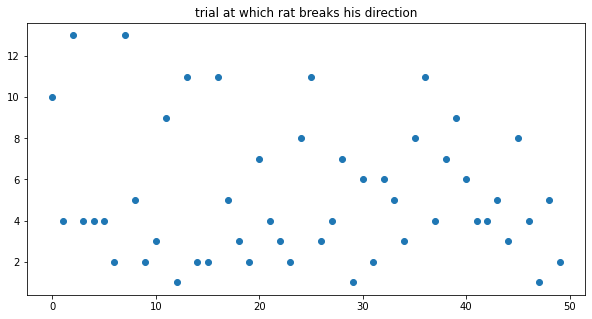

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(range(len(first_break)),first_break)

plt.title('trial at which rat breaks his direction')


In [20]:
prop_switch_dir=[]
num_bouts=[]
num_breaks=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
#         plt.figure()
        if len(sess)>0:
#             if len(sess)==300:
            stemswitch= sess[sess['stem_switch']==1]
            stems = stemswitch['stem']
    #         contin=sess.iloc[0]['contingency']
            RorL=[]

                # If A->C or C->B or B->A, R
            for ix in range(len(stems)):
                if ix<len(stems)-1:
                    stem1=stems.iloc[ix]
                    stem2 = stems.iloc[ix+1]
                    if stem1=='A':
                        if stem2=='B':
                            RorL.append('L')
                        elif stem2=='C':
                            RorL.append('R')
                    elif stem1=='B':
                        if stem2=='C':
                            RorL.append('L')
                        elif stem2=='A':
                            RorL.append('R')
                    elif stem1=='C':
                        if stem2=='A':
                            RorL.append('L')
                        elif stem2=='B':
                            RorL.append('R')
            df1= pd.DataFrame(RorL,columns=['R/L'])
            df1['rLSwitch']= df1['R/L'].ne(df1['R/L'].shift()).cumsum()
            df1
            numbouts=len(df1)
            numbreaks=df1.rLSwitch.max()

            prop_not_cont=numbreaks/numbouts
            prop_switch_dir.append(prop_not_cont)
            num_bouts.append(numbouts)
            num_breaks.append(numbreaks)
            

        #             plt.plot(RorL)
        #             plt.title(f'day={day1},session={sess1},contin={contin}')
            #     print(stems.iloc[ix])

Text(0, 0.5, 'proportion of switches he breaks direction bias')

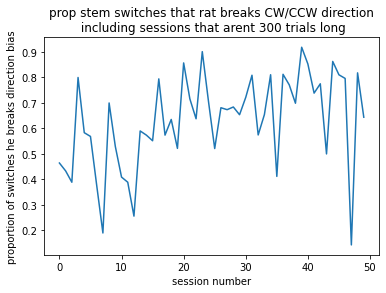

In [21]:
plt.plot(prop_switch_dir)
plt.title('prop stem switches that rat breaks CW/CCW direction\n including sessions that arent 300 trials long')
plt.xlabel('session number')
plt.ylabel('proportion of switches he breaks direction bias')

In [22]:
#now want to make into df and find day changes 
prop_switch_dir=[]
day_lst=[]
sess_lst=[]
num_bouts=[]
num_breaks=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
#         plt.figure()
        if len(sess)>0:
            if len(sess)==300:
                stemswitch= sess[sess['stem_switch']==1]
                stems = stemswitch['stem']
        #         contin=sess.iloc[0]['contingency']
                RorL=[]

                    # If A->C or C->B or B->A, R
                for ix in range(len(stems)):
                    if ix<len(stems)-1:
                        stem1=stems.iloc[ix]
                        stem2 = stems.iloc[ix+1]
                        if stem1=='A':
                            if stem2=='B':
                                RorL.append('L')
                            elif stem2=='C':
                                RorL.append('R')
                        elif stem1=='B':
                            if stem2=='C':
                                RorL.append('L')
                            elif stem2=='A':
                                RorL.append('R')
                        elif stem1=='C':
                            if stem2=='A':
                                RorL.append('L')
                            elif stem2=='B':
                                RorL.append('R')
                df1= pd.DataFrame(RorL,columns=['R/L'])
                df1['rLSwitch']= df1['R/L'].ne(df1['R/L'].shift()).cumsum()
                df1
                numbouts=len(df1)
                numbreaks=df1.rLSwitch.max()

                prop_not_cont=numbreaks/numbouts
                prop_switch_dir.append(prop_not_cont)
                day_lst.append(day1)
                sess_lst.append(sess1)
                num_bouts.append(numbouts)
                num_breaks.append(numbreaks)

        #             plt.plot(RorL)
        #             plt.title(f'day={day1},session={sess1},contin={contin}')
            #     print(stems.iloc[ix])

In [23]:
data = [prop_switch_dir,day_lst,sess_lst]
df2= pd.DataFrame(data)#columns=['prop_switch','day','session'])
df2=df2.transpose()
df2.columns = ['prop_switch','day','session']
df2['day_switch']=df2['day'].ne(df2['day'].shift())

In [24]:
df2

,prop_switch,day,session,day_switch
0,0.464286,1.0,1.0,True
1,0.433333,1.0,2.0,False
2,0.388889,1.0,3.0,False
3,0.800000,1.0,4.0,False
4,0.583333,2.0,2.0,True
5,0.568627,2.0,3.0,False
6,0.377049,2.0,4.0,False
7,0.189655,3.0,1.0,True
8,0.529412,3.0,3.0,False
9,0.590164,4.0,3.0,True


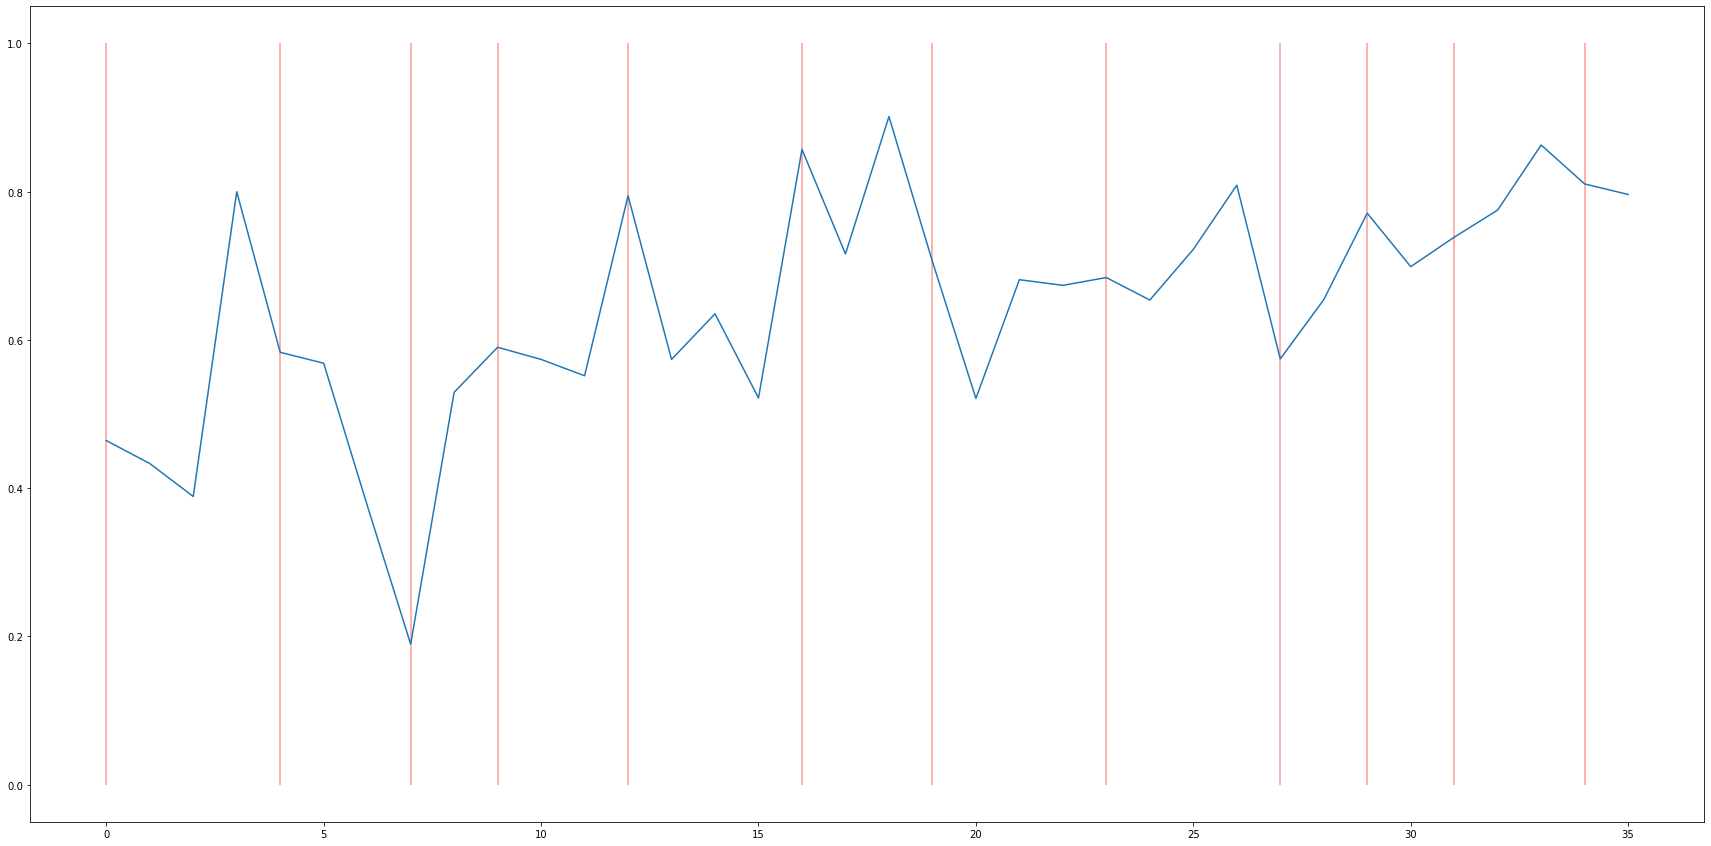

In [25]:
plt.figure(figsize=(30,15))
plt.plot(df2.prop_switch.index,df2.prop_switch)
plt.vlines(df2[df2.day_switch==1].index,0,1,color='red',alpha=.4)
# plt.title('prop stem switches that rat breaks CW/CCW direction\n including sessions that arent 300 trials long')
# plt.xlabel('session number')
# plt.ylabel('proportion of switches he breaks direction bias')

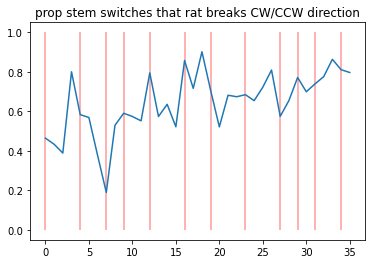

In [26]:
plt.plot(df2.prop_switch.index,df2.prop_switch)

plt.title('prop stem switches that rat breaks CW/CCW direction')
plt.vlines(df2[df2.day_switch==1].index,0,1,color='red',alpha=.4)



In [27]:
#maybe define B/M/W stem based on original contingency. Then check if the stems hes at is the B,M,W. 
#Then can see if he stops going to the worst, flips between B/M 


In [28]:
# for ix in range(len(df)):
#     cont= str(df.loc[ix, 'contingency'])
#     cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
#     cont = [int(i) for i in cont]
#     df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)

for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        cont= str(df.loc[ix, 'contingency'])
        cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
        cont = [int(i) for i in cont]
        avg_A= statistics.mean(cont[0:2])
        avg_B = statistics.mean(cont[2:4])
        avg_C= statistics.mean(cont[4:6])
        if (avg_A > avg_B) & (avg_A> avg_C):
            best_stem = 'A'
        elif (avg_B > avg_A) & (avg_B> avg_C):
            best_stem = 'B'
        elif (avg_C > avg_B) & (avg_C>avg_A):
            best_stem = 'C'    
        df.loc[ix, 'best_stem'] = best_stem
#         if (avg_A > avg_B):
#             if (avg_A< avg_C):
#                 medium_stem = 'A'
#         elif (avg_B > avg_A):
#             if (avg_B< avg_C):
#                 medium_stem = 'B'
#         elif (avg_C > avg_B):
#             if (avg_C<avg_A):
#                 medium_stem = 'C'
#         df.loc[ix, 'medium_stem'] = medium_stem
        if (avg_A < avg_B) & (avg_A< avg_C):
            worst_stem = 'A'
        elif (avg_B < avg_A) & (avg_B< avg_C):
            worst_stem = 'B'
        elif (avg_C < avg_B) & (avg_C<avg_A):
            worst_stem = 'C'
        df.loc[ix, 'worst_stem'] = worst_stem
        if df.loc[ix,'best_stem']=='A':
            if df.loc[ix,'worst_stem']=='C':
                df.loc[ix,'medium_stem'] ='B'
            if df.loc[ix,'worst_stem']=='B':
                df.loc[ix,'medium_stem'] ='C'
        if df.loc[ix,'best_stem']=='B':
            if df.loc[ix,'worst_stem']=='C':
                df.loc[ix,'medium_stem'] ='A'
            if df.loc[ix,'worst_stem']=='A':
                df.loc[ix,'medium_stem'] ='C'
        if df.loc[ix,'best_stem']=='C':
            if df.loc[ix,'worst_stem']=='A':
                df.loc[ix,'medium_stem'] ='B'
            if df.loc[ix,'worst_stem']=='B':
                df.loc[ix,'medium_stem'] ='A'
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,bout_num,sess_chng,rew_count_session,rew_count_session_total,best_stem,worst_stem,medium_stem
0,0,4,B,1,805020802050,20201109,1,0,1,1,1,True,True,1,1,1,1,A,C,B
1,1,3,B,0,805020642050,20201109,1,1,1,2,2,False,False,1,1,1,1,NaN,NaN,NaN
2,2,4,B,1,805016642050,20201109,1,2,1,3,3,False,False,1,1,2,2,NaN,NaN,NaN
3,3,3,B,0,805016512050,20201109,1,3,1,4,4,False,False,1,1,2,2,NaN,NaN,NaN
4,4,4,B,0,805012512050,20201109,1,4,1,5,5,False,False,1,1,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,18421,False,False,4616,67,79,130,NaN,NaN,NaN
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,18422,False,False,4616,67,80,131,NaN,NaN,NaN
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,18423,False,False,4616,67,81,132,NaN,NaN,NaN
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,18424,False,False,4616,67,81,132,NaN,NaN,NaN


In [29]:
df = df.ffill()

In [30]:
for ix in range(len(df)):
    if df.loc[ix,'stem']== df.loc[ix,'best_stem']:
        df.loc[ix,'at_best']=2
    if df.loc[ix,'stem']== df.loc[ix,'medium_stem']:
        df.loc[ix,'at_medium']=1 
    if df.loc[ix,'stem']== df.loc[ix,'worst_stem']:
        df.loc[ix,'at_worst']=0
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,bout_num,sess_chng,rew_count_session,rew_count_session_total,best_stem,worst_stem,medium_stem,at_medium,at_best,at_worst
0,0,4,B,1,805020802050,20201109,1,0,1,1,...,1,1,1,1,A,C,B,1.0,NaN,NaN
1,1,3,B,0,805020642050,20201109,1,1,1,2,...,1,1,1,1,A,C,B,1.0,NaN,NaN
2,2,4,B,1,805016642050,20201109,1,2,1,3,...,1,1,2,2,A,C,B,1.0,NaN,NaN
3,3,3,B,0,805016512050,20201109,1,3,1,4,...,1,1,2,2,A,C,B,1.0,NaN,NaN
4,4,4,B,0,805012512050,20201109,1,4,1,5,...,1,1,2,2,A,C,B,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,...,4616,67,79,130,C,A,B,NaN,2.0,NaN
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,...,4616,67,80,131,C,A,B,NaN,2.0,NaN
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,...,4616,67,81,132,C,A,B,NaN,2.0,NaN
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,...,4616,67,81,132,C,A,B,NaN,2.0,NaN


In [31]:
for ix in range(len(df)):
    if df.loc[ix,'stem']== df.loc[ix,'best_stem']:
        df.loc[ix,'at_best']=2
    if df.loc[ix,'stem']== df.loc[ix,'medium_stem']:
        df.loc[ix,'at_best']=1 
    if df.loc[ix,'stem']== df.loc[ix,'worst_stem']:
        df.loc[ix,'at_best']=0
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,bout_num,sess_chng,rew_count_session,rew_count_session_total,best_stem,worst_stem,medium_stem,at_medium,at_best,at_worst
0,0,4,B,1,805020802050,20201109,1,0,1,1,...,1,1,1,1,A,C,B,1.0,1.0,NaN
1,1,3,B,0,805020642050,20201109,1,1,1,2,...,1,1,1,1,A,C,B,1.0,1.0,NaN
2,2,4,B,1,805016642050,20201109,1,2,1,3,...,1,1,2,2,A,C,B,1.0,1.0,NaN
3,3,3,B,0,805016512050,20201109,1,3,1,4,...,1,1,2,2,A,C,B,1.0,1.0,NaN
4,4,4,B,0,805012512050,20201109,1,4,1,5,...,1,1,2,2,A,C,B,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,...,4616,67,79,130,C,A,B,NaN,2.0,NaN
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,...,4616,67,80,131,C,A,B,NaN,2.0,NaN
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,...,4616,67,81,132,C,A,B,NaN,2.0,NaN
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,...,4616,67,81,132,C,A,B,NaN,2.0,NaN


In [32]:
first_day=df[df.day==1]
first_sesh=first_day[first_day.session==1]

Text(0.5, 1.0, 'best=2,medium=1,worst=0')

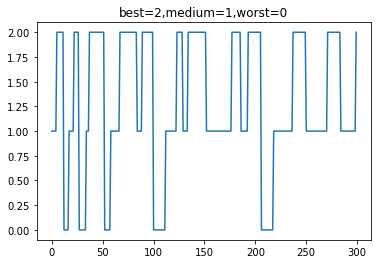

In [33]:
plt.plot(first_sesh.at_best)
plt.title('best=2,medium=1,worst=0')
# plt.plot(first_sesh.at_medium)
# plt.plot(first_sesh.at_worst)

In [ ]:
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)==300:
            contin=sess.iloc[0]['contingency']
            plt.figure()
            plt.plot(sess.at_best)
            plt.title(f'day={day1},session={sess1},contin={contin}\n2=best,1=medium,0=worst')
            plt.plot((sess.rew_count_session_total/(sess.rew_count_session_total.max()))*2) #ooh weird added this line and values of rew_count_session are wrong.. 



In [35]:
sess.rew_count_session[0:10]


16919    1
16920    2
16921    2
16922    2
16923    2
16924    0
16925    1
16926    2
16927    3
16928    1
Name: rew_count_session, dtype: int64

In [36]:
#maybe can look at how many left and right turns he makes on every trial by leaf. 
#Oh interesting, maybe should plot proportion of total rewards he gets up to this point/trial (*2) on top of this. to see how strategy relates to reward. 

In [37]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,bout_num,sess_chng,rew_count_session,rew_count_session_total,best_stem,worst_stem,medium_stem,at_medium,at_best,at_worst
0,0,4,B,1,805020802050,20201109,1,0,1,1,...,1,1,1,1,A,C,B,1.0,1.0,NaN
1,1,3,B,0,805020642050,20201109,1,1,1,2,...,1,1,1,1,A,C,B,1.0,1.0,NaN
2,2,4,B,1,805016642050,20201109,1,2,1,3,...,1,1,2,2,A,C,B,1.0,1.0,NaN
3,3,3,B,0,805016512050,20201109,1,3,1,4,...,1,1,2,2,A,C,B,1.0,1.0,NaN
4,4,4,B,0,805012512050,20201109,1,4,1,5,...,1,1,2,2,A,C,B,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,...,4616,67,79,130,C,A,B,NaN,2.0,NaN
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,...,4616,67,80,131,C,A,B,NaN,2.0,NaN
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,...,4616,67,81,132,C,A,B,NaN,2.0,NaN
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,...,4616,67,81,132,C,A,B,NaN,2.0,NaN


In [38]:
# for day1 in range(1,(df.day).max()):
#     day3=df[df['day']==day1]
#     for sess1 in range(((day3.session).max())):
#         sess=day3[day3['session']==sess1]
# #         plt.figure()
# #         if len(sess)>0:
# # #             stemswitch= sess[sess['stem_switch']==1]
# #             leaf = sess['leaf']
# #             contin=sess.iloc[0]['contingency']
# #             RorL=[]
            
#         # If A->C or C->B or B->A, R
#         for ix in range(len(sess)):
#             if ix<len(sess)-1:
#                 leaf1=sess.iloc[ix]['leaf']
#                 leaf2=sess.iloc[ix+1]['leaf']
# #                     if stem1=='A':
# #                         if stem2=='B':
# #                             RorL.append('L')
# #                         elif stem2=='C':
# #                             RorL.append('R')
# #                     elif stem1=='B':
# #                         if stem2=='C':
# #                             RorL.append('L')
# #                         elif stem2=='A':
# #                             RorL.append('R')
# #                     elif stem1=='C':
# #                         if stem2=='A':
# #                             RorL.append('L')
# #                         elif stem2=='B':
# #                             RorL.append('R')
# #             plt.plot(RorL)
# #             plt.title(f'day={day1},session={sess1},contin={contin}')
#     #     print(stems.iloc[ix])

In [39]:
df['rew_count_session']

0         1
1         1
2         2
3         2
4         2
         ..
18999    79
19000    80
19001    81
19002    81
19003    81
Name: rew_count_session, Length: 19004, dtype: int64

In [40]:
# leaf1=sess.iloc[ix]['leaf']

In [41]:
# leaf1

In [42]:
#1->2=L, 2->3=L. So, if Leaf2>leaf1,hes going L. Oooh my this gets so complciated. 
#What I should at first is once he enters a stem, does he go left or right first? 
#and maybe, when he leaves a stem, does he go left or right.. already did that. 
#When stemswitch=true, its the first trial at the new stem. 
# if stem =a, and leaf =2, R. if stem=a and leaf = 1. 
# This will basically ask how aften he starts a given stem by going left or right. 
#one more relevant question and possibly easier to answer is how often he starts a stem at a certain leaf, and how that relates to how good that leaf is. 

In [43]:
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max()-1)):
        startleafA=[]
        startleafB=[]
        startleafC=[]
        sess=day3[day3['session']==sess1]
#         plt.figure()
        if len(sess)>0:
#             if len(sess)==300:
            stemswitch= sess[sess['stem_switch']==1]
            for ix in range(len(stemswitch)):
                if stemswitch.iloc[ix]['stem'] =='A':
                    startleafA.append(stemswitch.iloc[ix]['leaf'])
                if stemswitch.iloc[ix]['stem'] =='B':
                    startleafB.append(stemswitch.iloc[ix]['leaf'])
                if stemswitch.iloc[ix]['stem'] =='C':
                    startleafC.append(stemswitch.iloc[ix]['leaf'])
    #         contin=sess.iloc[0]['contingency']

                # If A->C or C->B or B->A, R
#             for ix in range(len(stems)):
#                 if ix<len(stems)-1:
#                     stem1=stems.iloc[ix]
#                     stem2 = stems.iloc[ix+1]
#                     if stem1=='A':
#                         if stem2=='B':
#                             RorL.append('L')
#                         elif stem2=='C':
#                             RorL.append('R')
#                     elif stem1=='B':
#                         if stem2=='C':
#                             RorL.append('L')
#                         elif stem2=='A':
#                             RorL.append('R')
#                     elif stem1=='C':
#                         if stem2=='A':
#                             RorL.append('L')
#                         elif stem2=='B':
#                             RorL.append('R')
#             df1= pd.DataFrame(RorL,columns=['R/L'])
#             df1['rLSwitch']= df1['R/L'].ne(df1['R/L'].shift()).cumsum()
#             df1
#             numbouts=len(df1)
#             numbreaks=df1.rLSwitch.max()

#             prop_not_cont=numbreaks/numbouts
#             prop_switch_dir.append(prop_not_cont)
#             num_bouts.append(numbouts)
#             num_breaks.append(numbreaks)
            

        #             plt.plot(RorL)
        #             plt.title(f'day={day1},session={sess1},contin={contin}')
            #     print(stems.iloc[ix])

In [44]:
stemswitch

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,bout_num,sess_chng,rew_count_session,rew_count_session_total,best_stem,worst_stem,medium_stem,at_medium,at_best,at_worst
16669,16669,3,B,0,508020208020,20201120,4,0,12,1,...,4039,60,0,0,A,B,C,NaN,0.0,0.0
16673,16673,5,C,0,508020208020,20201120,4,4,12,5,...,4040,60,0,1,A,B,C,1.0,1.0,NaN
16677,16677,1,A,0,508020208020,20201120,4,8,12,9,...,4041,60,0,2,A,B,C,NaN,2.0,NaN
16683,16683,4,B,0,508020208020,20201120,4,14,12,15,...,4042,60,1,5,A,B,C,NaN,0.0,0.0
16686,16686,6,C,1,508020208020,20201120,4,17,12,18,...,4043,60,2,8,A,B,C,1.0,1.0,NaN
16690,16690,1,A,1,508020208020,20201120,4,21,12,22,...,4044,60,4,10,A,B,C,NaN,2.0,NaN
16694,16694,6,C,0,508020208020,20201120,4,25,12,26,...,4045,60,3,12,A,B,C,1.0,1.0,NaN
16698,16698,3,B,0,508020208020,20201120,4,29,12,30,...,4046,60,3,14,A,B,C,NaN,0.0,0.0
16701,16701,2,A,0,508020208020,20201120,4,32,12,33,...,4047,60,6,14,A,B,C,NaN,2.0,NaN
16704,16704,6,C,1,508020208020,20201120,4,35,12,36,...,4048,60,6,16,A,B,C,1.0,1.0,NaN


In [45]:
startleafC

[5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5]

In [46]:
# df_reg = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')

In [47]:
# # df['stem_switch'] = df['stem'].ne(df['stem'].shift()) #T/F when he switches stems 
# # df['day']= df['date'].ne(df['date'].shift()).cumsum()
# df_reg['day']= df_reg['date'].ne(df_reg['date'].shift()).cumsum()
# #df['diff_cont'] = df.groupby(['day','session'],group_keys=True)['contingency']
# df_reg['diff_cont'] = df_reg['contingency'].ne(df_reg['contingency'].shift())


# df_reg['cont_num'] = df_reg.groupby(['day','session'])['diff_cont'].cumsum()
# del df_reg['diff_cont']
# df_reg['new_cont'] = df_reg['cont_num'].ne(df_reg['cont_num'].shift()).cumsum() #count from 1:222 for senor, eevry contingency numbered incremet

# df_reg['day_chng'] = df_reg['day'].ne(df_reg['day'].shift()) #T/F , first trial of new day T
# df_reg['stem_switch'] = df_reg['stem'].ne(df_reg['stem'].shift()) #T/F when he switches stems 
# for ix in range(len(df_reg)):
#     if df_reg.loc[ix,'trial']==0:
#         df_reg.loc[ix,'stem_switch']= True
# df_reg['bout_num'] = df_reg['stem'].ne(df_reg['stem'].shift()).cumsum() #incremnts each bout 



# # df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
# # for ix in range(len(df)): #find the global nominal average 
# #     cont= str(df.loc[ix, 'contingency'])
# #     cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
# #     cont = [int(i) for i in cont]
# #     df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
# #     for counter in range(6):
# #         df.loc[ix,f'leaf{counter+1}'] = cont[counter]
# df_reg['sess_chng'] = df_reg['session'].ne(df_reg['session'].shift()).cumsum()
# obj = ['day', 'session', 'stem']

# df_reg['rew_count_session'] = df_reg.groupby(obj)[['reward']].cumsum()
# # obj1 = ['day', 'session', 'stem','cont_num']
# # df[]
# df_reg[0:5]

In [48]:
# startleafA=[]
# startleafB=[]
# startleafC=[]
# for day1 in range(1,(df_reg.day).max()):
#     day3=df_reg[df_reg['day']==day1]
#     for sess1 in range(((day3.session).max()-1)):
#         sess=day3[day3['session']==sess1]
# #         plt.figure()
#         if len(sess)>0:
# #             if len(sess)==300:
#             stemswitch= sess[sess['stem_switch']==1]
#             for ix in range(len(stemswitch)):
#                 if stemswitch.iloc[ix]['stem'] =='A':
#                     startleafA.append(stemswitch.iloc[ix]['leaf'])
#                 if stemswitch.iloc[ix]['stem'] =='B':
#                     startleafB.append(stemswitch.iloc[ix]['leaf'])
#                 if stemswitch.iloc[ix]['stem'] =='C':
#                     startleafC.append(stemswitch.iloc[ix]['leaf'])
#     #         contin=sess.iloc[0]['contingency']

Text(0.5, 1.0, 'in reg, how many times starting one leaf vs other')

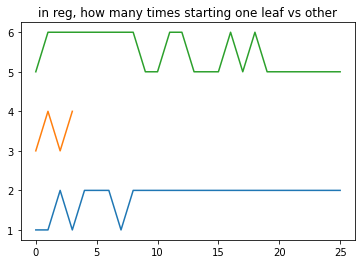

In [49]:
plt.plot(startleafA)
plt.plot(startleafB)
plt.plot(startleafC)
plt.title('in reg, how many times starting one leaf vs other')



Text(0.5, 1.0, 'in dep, how many times starting one leaf vs other')

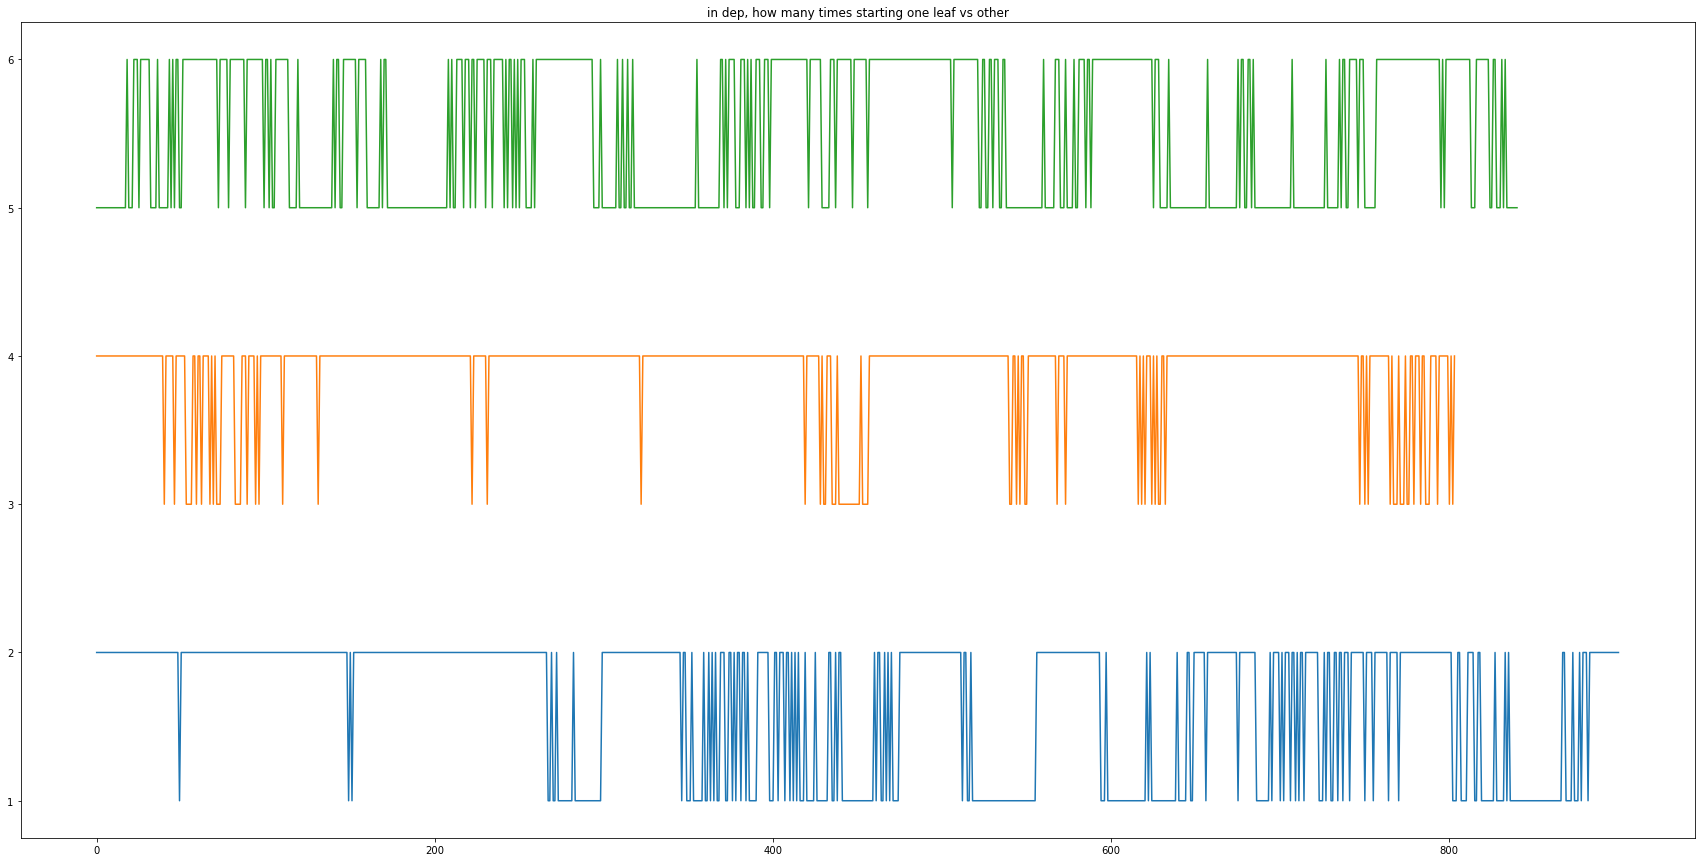

In [50]:
startleafA=[]
startleafB=[]
startleafC=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max()-1)):

        sess=day3[day3['session']==sess1]
#         plt.figure()
        if len(sess)>0:
#             if len(sess)==300:
            stemswitch= sess[sess['stem_switch']==1]
            for ix in range(len(stemswitch)):
                if stemswitch.iloc[ix]['stem'] =='A':
                    startleafA.append(stemswitch.iloc[ix]['leaf'])
                if stemswitch.iloc[ix]['stem'] =='B':
                    startleafB.append(stemswitch.iloc[ix]['leaf'])
                if stemswitch.iloc[ix]['stem'] =='C':
                    startleafC.append(stemswitch.iloc[ix]['leaf'])
plt.figure(figsize=(30,15))                    
plt.plot(startleafA)
plt.plot(startleafB)
plt.plot(startleafC)
plt.title('in dep, how many times starting one leaf vs other')

In [ ]:
startleafA

In [52]:
from collections import Counter
Counter(startleafB)[4]

719

Text(0.5, 1.0, 'in depletion version, proportion of times start bout at each leaf')

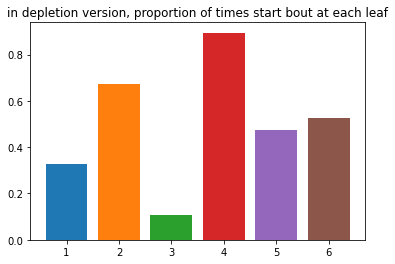

In [53]:
totalstartsA=len(startleafA)
totalstartsB=len(startleafB)
totalstartsC=len(startleafC)
start1=Counter(startleafA)[1]
start2=Counter(startleafA)[2]
start3=Counter(startleafB)[3]
start4=Counter(startleafB)[4]
start5=Counter(startleafC)[5]
start6=Counter(startleafC)[6]
prop1=start1/totalstartsA
prop2=start2/totalstartsA
prop3=start3/totalstartsB
prop4=start4/totalstartsB
prop5=start5/totalstartsC
prop6=start6/totalstartsC

plt.bar(1,prop1)
plt.bar(2,prop2)
plt.bar(3,prop3)
plt.bar(4,prop4)
plt.bar(5,prop5)
plt.bar(6,prop6)

list_starts= [prop1,prop2,prop3,prop4,prop5,prop6]
plt.title('in depletion version, proportion of times start bout at each leaf')

Text(0.5, 1.0, 'in reg version, proportion of times start bout at each leaf, first half of "expt"')

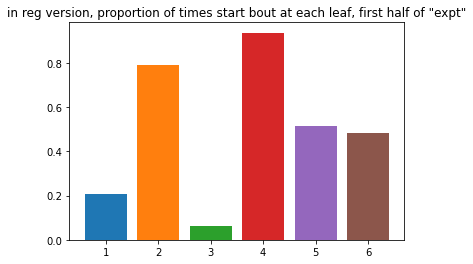

In [54]:
startleafA_firsthalf = startleafA[0:int(len(startleafA)/2)]
startleafB_firsthalf = startleafB[0:int(len(startleafB)/2)]
startleafC_firsthalf = startleafC[0:int(len(startleafC)/2)]


totalstartsA_1st=len(startleafA_firsthalf)
totalstartsB_1st=len(startleafB_firsthalf)
totalstartsC_1st=len(startleafC_firsthalf)
start1=Counter(startleafA_firsthalf)[1]
start2=Counter(startleafA_firsthalf)[2]
start3=Counter(startleafB_firsthalf)[3]
start4=Counter(startleafB_firsthalf)[4]
start5=Counter(startleafC_firsthalf)[5]
start6=Counter(startleafC_firsthalf)[6]
prop1=start1/totalstartsA_1st
prop2=start2/totalstartsA_1st
prop3=start3/totalstartsB_1st
prop4=start4/totalstartsB_1st
prop5=start5/totalstartsC_1st
prop6=start6/totalstartsC_1st

plt.bar(1,prop1)
plt.bar(2,prop2)
plt.bar(3,prop3)
plt.bar(4,prop4)
plt.bar(5,prop5)
plt.bar(6,prop6)


plt.title('in reg version, proportion of times start bout at each leaf, first half of "expt"')



Text(0.5, 1.0, 'in reg version, proportion of times start bout at each leaf, second half of "expt"')

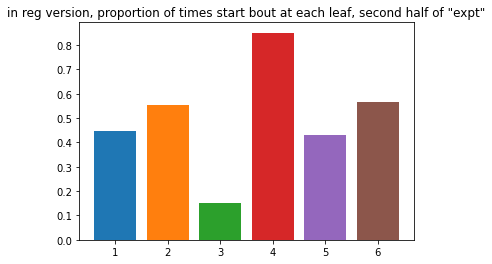

In [55]:
startleafA_secondhalf = startleafA[int(len(startleafA)/2):]
startleafB_secondhalf = startleafB[int(len(startleafB)/2):]
startleafC_secondhalf = startleafC[int(len(startleafC)/2):]


totalstartsA_2nd=len(startleafA_secondhalf)
totalstartsB_2nd=len(startleafB_secondhalf)
totalstartsC_2nd=len(startleafC_secondhalf)
start1=Counter(startleafA_secondhalf)[1]
start2=Counter(startleafA_secondhalf)[2]
start3=Counter(startleafB_secondhalf)[3]
start4=Counter(startleafB_secondhalf)[4]
start5=Counter(startleafC_secondhalf)[5]
start6=Counter(startleafC_secondhalf)[6]
prop1=start1/totalstartsA_2nd
prop2=start2/totalstartsA_2nd
prop3=start3/totalstartsB_2nd
prop4=start4/totalstartsB_2nd
prop5=start5/totalstartsC_2nd
prop6=start6/totalstartsC_2nd

plt.bar(1,prop1)
plt.bar(2,prop2)
plt.bar(3,prop3)
plt.bar(4,prop4)
plt.bar(5,prop5)
plt.bar(6,prop6)


plt.title('in reg version, proportion of times start bout at each leaf, second half of "expt"')



In [56]:
len(startleafA)/2

450.5

In [57]:
#should compare this with the value of each leaf. maybe it doesnt matter where he start sin the regular as much as in the depletion. 

In [58]:
df['cont']=df[df.trial==0]['contingency']
df=df.ffill()
for ix in range(len(df)):
    cont= str(df.loc[ix, 'cont'])
    cont = [cont[i:i+2] for i in range(0, len(cont)-2, 2)]
#     cont =cont.pop()
    cont = [int(i) for i in cont]
    df.loc[ix,'leaf1']=cont[0]
    df.loc[ix,'leaf2']=cont[1]
    df.loc[ix,'leaf3']=cont[2]
    df.loc[ix,'leaf4']=cont[3]
    df.loc[ix,'leaf5']=cont[4]
    df.loc[ix,'leaf6']=cont[5]

In [59]:
cont[0]

20

In [60]:
df['cont']=df[df.trial==0]['contingency']
df=df.ffill()

In [61]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,at_medium,at_best,at_worst,cont,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6
0,0,4,B,1,805020802050,20201109,1,0,1,1,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
1,1,3,B,0,805020642050,20201109,1,1,1,2,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
2,2,4,B,1,805016642050,20201109,1,2,1,3,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
3,3,3,B,0,805016512050,20201109,1,3,1,4,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
4,4,4,B,0,805012512050,20201109,1,4,1,5,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0


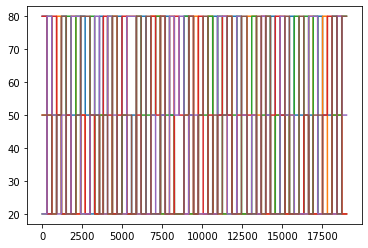

In [62]:
plt.plot(df.leaf1)
plt.plot(df.leaf2)
plt.plot(df.leaf3)
plt.plot(df.leaf4)
plt.plot(df.leaf5)
plt.plot(df.leaf6)

In [63]:
a1 = statistics.mean(df.leaf1)

In [64]:
a2 = statistics.mean(df.leaf2)

In [65]:
a3 =statistics.mean(df.leaf3)

In [66]:
a4=statistics.mean(df.leaf4)

In [67]:
a5=statistics.mean(df.leaf5)

In [68]:
a6= statistics.mean(df.leaf6)

In [69]:
list_avgs= [a1,a2,a3,a4,a5,a6]

Text(0, 0.5, 'average of nominal prob')

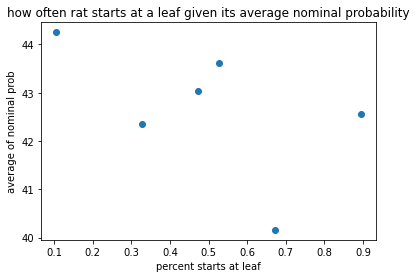

In [70]:
plt.scatter(list_starts,list_avgs)
plt.title('how often rat starts at a leaf given its average nominal probability')
plt.xlabel('percent starts at leaf')
plt.ylabel('average of nominal prob')

In [71]:
# for every session, how many trials does he start at each stem? What was the prob at that stem? 


In [ ]:
startleafA=[]
startleafB=[]
startleafC=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max()-1)):

        sess=day3[day3['session']==sess1]
        
#         plt.figure()
        if len(sess)>0:
            contin=sess.iloc[0]['contingency']
#             if len(sess)==300:
            trials1= Counter(sess['leaf']==1)[True]
            trials2= Counter(sess['leaf']==2)[True]
            trials3= Counter(sess['leaf']==3)[True]
            trials4= Counter(sess['leaf']==4)[True]
            trials5= Counter(sess['leaf']==5)[True]
            trials6= Counter(sess['leaf']==6)[True]
            prob1=sess.iloc[0]['leaf1']
            prob2=sess.iloc[0]['leaf2']
            prob3=sess.iloc[0]['leaf3']
            prob4=sess.iloc[0]['leaf4']
            prob5=sess.iloc[0]['leaf5']
            prob6=sess.iloc[0]['leaf6']
            plt.figure()
            lo=plt.scatter(trials1,prob1)
            ll=plt.scatter(trials2,prob2)
            l=plt.scatter(trials3,prob3)
            a=plt.scatter(trials4,prob4)
            h=plt.scatter(trials5,prob5)
            hh=plt.scatter(trials6,prob6)
            plt.legend((lo, ll, l, a, h, hh),('1', '2', '3', '4', '5', '6'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
            plt.xlabel('num trials at leaf')
            plt.ylabel('prob at leaf')
            plt.title(f'day={day1},session={sess1},contin={contin}')



In [73]:
len(sess)

250

In [74]:
# what i can do is look at his total LR bais in regular vs depletion? 

In [75]:
#can make a list, cpount toal number or l, r turns 
turns=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max()-1)):
        sess=day3[day3['session']==sess1]
        for ix in range(len(sess)):
            if ix <len(sess)-1:
                if sess.iloc[ix]['leaf'] ==1:
                    if sess.iloc[ix+1]['leaf']==2:
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==3:
                        turns.append('R')
                        turns.append('L')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==4:
                        turns.append('R')
                        turns.append('L')
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==5:
                        turns.append('R')
                        turns.append('R')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==6:
                        turns.append('R')
                        turns.append('R')
                        turns.append('R')
                if sess.iloc[ix]['leaf'] ==2:
                    if sess.iloc[ix+1]['leaf']==1:
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==3:
                        turns.append('L')
                        turns.append('L')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==4:
                        turns.append('L')
                        turns.append('L')
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==5:
                        turns.append('L')
                        turns.append('R')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==6:
                        turns.append('L')
                        turns.append('R')
                        turns.append('R')
                if sess.iloc[ix]['leaf'] ==3:
                    if sess.iloc[ix+1]['leaf']==4:
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==1:
                        turns.append('R')
                        turns.append('R')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==2:
                        turns.append('R')
                        turns.append('R')
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==5:
                        turns.append('R')
                        turns.append('L')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==6:
                        turns.append('R')
                        turns.append('L')
                        turns.append('R')
                if sess.iloc[ix]['leaf'] ==4:
                    if sess.iloc[ix+1]['leaf']==3:
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==1:
                        turns.append('L')
                        turns.append('R')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==2:
                        turns.append('L')
                        turns.append('R')
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==5:
                        turns.append('L')
                        turns.append('L')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==6:
                        turns.append('L')
                        turns.append('L')
                        turns.append('R')
                if sess.iloc[ix]['leaf'] ==5:
                    if sess.iloc[ix+1]['leaf']==6:
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==1:
                        turns.append('R')
                        turns.append('L')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==2:
                        turns.append('R')
                        turns.append('L')
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==3:
                        turns.append('R')
                        turns.append('R')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==4:
                        turns.append('R')
                        turns.append('R')
                        turns.append('R')
                if sess.iloc[ix]['leaf'] ==6:
                    if sess.iloc[ix+1]['leaf']==5:
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==1:
                        turns.append('L')
                        turns.append('L')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==2:
                        turns.append('L')
                        turns.append('L')
                        turns.append('R')
                    if sess.iloc[ix+1]['leaf']==3:
                        turns.append('L')
                        turns.append('R')
                        turns.append('L')
                    if sess.iloc[ix+1]['leaf']==4:
                        turns.append('L')
                        turns.append('R')
                        turns.append('R')

In [76]:
Counter(turns)['R']

8625

In [77]:
Counter(turns)['L']

6842

(1.0, 0.0)

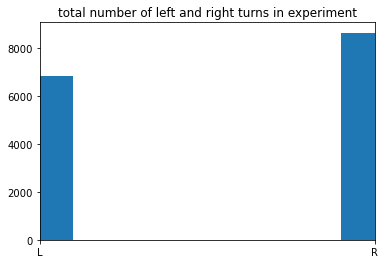

In [78]:
plt.hist(turns)
plt.title('total number of left and right turns in experiment')
plt.xlim(xmin='L', xmax = 'R')

(0.0, 1.0)

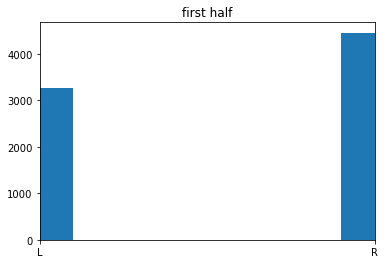

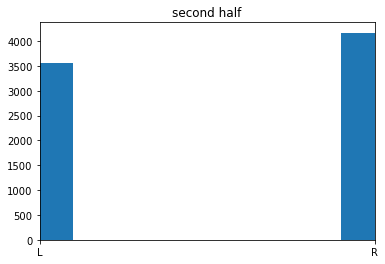

In [79]:
# plt.hist(turns)
# plt.title('total number of left and right turns in experiment')
plt.hist(turns[0:int(len(turns)/2)])
plt.title('first half')
plt.xlim(xmin='L', xmax = 'R')
plt.figure()
plt.hist(turns[int(len(turns)/2):])
plt.title('second half')
plt.xlim(xmin='L', xmax = 'R')

In [80]:
sess

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,at_medium,at_best,at_worst,cont,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6
16669,16669,3,B,0,508020208020,20201120,4,0,12,1,...,1.0,0.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16670,16670,4,B,1,508016208020,20201120,4,1,12,2,...,1.0,0.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16671,16671,3,B,0,508016168020,20201120,4,2,12,3,...,1.0,0.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16672,16672,4,B,0,508012168020,20201120,4,3,12,4,...,1.0,0.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16673,16673,5,C,0,508020208020,20201120,4,4,12,5,...,1.0,1.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16914,16914,5,C,1,508020206416,20201120,4,245,12,246,...,1.0,1.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16915,16915,2,A,1,508020208020,20201120,4,246,12,247,...,1.0,2.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16916,16916,1,A,0,506420208020,20201120,4,247,12,248,...,1.0,2.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0
16917,16917,2,A,1,406420208020,20201120,4,248,12,249,...,1.0,2.0,0.0,5.080202e+11,50.0,80.0,20.0,20.0,80.0,20.0


In [81]:
# df_reg

In [82]:
# turns=[]
# for day1 in range(1,(df_reg.day).max()):
#     day3=df_reg[df_reg['day']==day1]
#     for sess1 in range(((day3.session).max()-1)):
#         sess=day3[day3['session']==sess1]
#         for ix in range(len(sess)):
#             if ix <len(sess)-1:
#                 if sess.iloc[ix]['leaf'] ==1:
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==2:
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==3:
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==4:
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==5:
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==6:
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('R')

(0.0, 1.0)

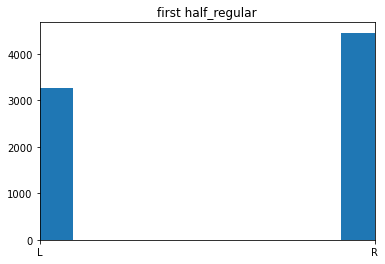

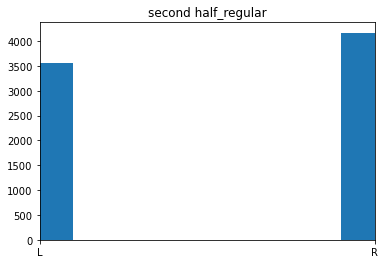

In [83]:
plt.hist(turns[0:int(len(turns)/2)])
plt.xlim(xmin='L', xmax = 'R')
plt.title('first half_regular')
plt.figure()
plt.hist(turns[int(len(turns)/2):])
plt.title('second half_regular')
plt.xlim(xmin='L', xmax = 'R')

(1.0, 0.0)

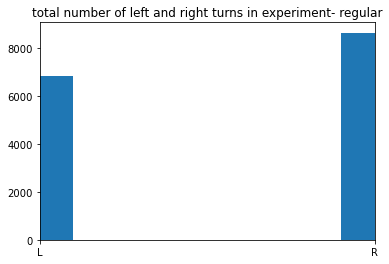

In [84]:
plt.hist(turns)
plt.title('total number of left and right turns in experiment- regular')
plt.xlim(xmin='L', xmax = 'R')

In [85]:
# prop_left=[]
# for day1 in range(1,(df_reg.day).max()):
#     day3=df_reg[df_reg['day']==day1]
#     for sess1 in range(((day3.session).max()-1)):
#         sess=day3[day3['session']==sess1]
#         turns=[]
# #         plt.figure()
#         for ix in range(len(sess)):
#             if ix <len(sess)-1:
#                 if sess.iloc[ix]['leaf'] ==1:
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==2:
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==3:
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==4:
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==5:
#                     if sess.iloc[ix+1]['leaf']==6:
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('R')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('R')
#                         turns.append('R')
#                         turns.append('R')
#                 if sess.iloc[ix]['leaf'] ==6:
#                     if sess.iloc[ix+1]['leaf']==5:
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==1:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==2:
#                         turns.append('L')
#                         turns.append('L')
#                         turns.append('R')
#                     if sess.iloc[ix+1]['leaf']==3:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('L')
#                     if sess.iloc[ix+1]['leaf']==4:
#                         turns.append('L')
#                         turns.append('R')
#                         turns.append('R')
#         if len(sess)>0:
#             prop_left.append(Counter(turns)['L']/len(turns))
#             plt.title('total number of left and right turns in experiment- regular')
#             plt.xlim(xmin='L', xmax = 'R')
#for every session, prop L turns. 

###### sess

In [86]:
Counter(turns)['L']

6842

In [87]:
len(turns)

15467

In [88]:
len(prop_left)

NameError: name 'prop_left' is not defined

In [ ]:
sess

In [ ]:
plt.scatter(range(len(prop_left)),prop_left)
plt.title('proportion of left turns per session across depletion version of task')

In [ ]:
#should find best leaf at medium stem. How many trials does he spend at that versus 2nd best at best stem? 

In [89]:
for ix in range(len(df)):
    if df.loc[ix,'trial']==0:
        cont= str(df.loc[ix, 'contingency'])
        cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
        cont = [int(i) for i in cont]
        df.loc[ix,'leaf1']=cont[0]
        df.loc[ix,'leaf2']=cont[1]
        df.loc[ix,'leaf3']=cont[2]
        df.loc[ix,'leaf4']=cont[3]
        df.loc[ix,'leaf5']=cont[4]
        df.loc[ix,'leaf6']=cont[5]
        #if best stem = A, if leaf 1>leaf2, best leaf 1. 

        
        


        
#         avg_A= statistics.mean(cont[0:2])
#         avg_B = statistics.mean(cont[2:4])
#         avg_C= statistics.mean(cont[4:6])
#         if (avg_A > avg_B) & (avg_A> avg_C):
#             best_stem = 'A'
#         elif (avg_B > avg_A) & (avg_B> avg_C):
#             best_stem = 'B'
#         elif (avg_C > avg_B) & (avg_C>avg_A):
#             best_stem = 'C'    
#         df.loc[ix, 'best_stem'] = best_stem
# #         if (avg_A > avg_B):
# #             if (avg_A< avg_C):
# #                 medium_stem = 'A'
# #         elif (avg_B > avg_A):
# #             if (avg_B< avg_C):
# #                 medium_stem = 'B'
# #         elif (avg_C > avg_B):
# #             if (avg_C<avg_A):
# #                 medium_stem = 'C'
# #         df.loc[ix, 'medium_stem'] = medium_stem
#         if (avg_A < avg_B) & (avg_A< avg_C):
#             worst_stem = 'A'
#         elif (avg_B < avg_A) & (avg_B< avg_C):
#             worst_stem = 'B'
#         elif (avg_C < avg_B) & (avg_C<avg_A):
#             worst_stem = 'C'
#         df.loc[ix, 'worst_stem'] = worst_stem
#         if df.loc[ix,'best_stem']=='A':
#             if df.loc[ix,'worst_stem']=='C':
#                 df.loc[ix,'medium_stem'] ='B'
#             if df.loc[ix,'worst_stem']=='B':
#                 df.loc[ix,'medium_stem'] ='C'
#         if df.loc[ix,'best_stem']=='B':
#             if df.loc[ix,'worst_stem']=='C':
#                 df.loc[ix,'medium_stem'] ='A'
#             if df.loc[ix,'worst_stem']=='A':
#                 df.loc[ix,'medium_stem'] ='C'
#         if df.loc[ix,'best_stem']=='C':
#             if df.loc[ix,'worst_stem']=='A':
#                 df.loc[ix,'medium_stem'] ='B'
#             if df.loc[ix,'worst_stem']=='B':
#                 df.loc[ix,'medium_stem'] ='A'
# df

In [90]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,at_medium,at_best,at_worst,cont,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6
0,0,4,B,1,805020802050,20201109,1,0,1,1,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
1,1,3,B,0,805020642050,20201109,1,1,1,2,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
2,2,4,B,1,805016642050,20201109,1,2,1,3,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
3,3,3,B,0,805016512050,20201109,1,3,1,4,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
4,4,4,B,0,805012512050,20201109,1,4,1,5,...,1.0,1.0,NaN,8.050208e+11,80.0,50.0,20.0,80.0,20.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18999,18999,5,C,1,202080205064,20201121,5,295,13,296,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0
19000,19000,6,C,1,202080204064,20201121,5,296,13,297,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0
19001,19001,5,C,1,202080204051,20201121,5,297,13,298,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0
19002,19002,6,C,0,202080203251,20201121,5,298,13,299,...,1.0,2.0,0.0,2.020802e+11,20.0,20.0,80.0,20.0,50.0,80.0


In [91]:
df[df['trial']==0]['contingency'].unique()

array([805020802050, 205080208050, 202050805020, 508050502050,
       802020205080, 502080502020, 508020208020, 502080208050,
       805020502080, 502020202080, 205080505050, 502020208050,
       805050202020, 202050802050, 202080508020, 208020205080,
       802020502020, 208020208050, 202080502080, 802050202020,
       202050202080, 208050805020, 208080502020, 502020805080,
       508050208020, 202020805020, 202020508020, 805080202050,
       208020205020, 802020202050, 502080508020, 502020808050,
       508020502080, 202020505080, 208020502020, 208080505020,
       205020202080, 202050808020, 502080205080, 205050802020,
       508020508020, 202050205080, 805020205020, 502080202020,
       202080502050, 202080208050, 508020502020, 502020802020,
       805050202080, 205050808020, 202080205080])

In [92]:
day7 = df[df['day']==7]
sess1= day7[day7['session']==2]

In [93]:
sess1

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,...,at_medium,at_best,at_worst,cont,leaf1,leaf2,leaf3,leaf4,leaf5,leaf6
8848,8848,4,B,0,805080202050,20201115,2,0,7,1,...,1.0,1.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
8849,8849,3,B,1,805080162050,20201115,2,1,7,2,...,1.0,1.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
8850,8850,4,B,0,805064162050,20201115,2,2,7,3,...,1.0,1.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
8851,8851,2,A,1,805080202050,20201115,2,3,7,4,...,1.0,2.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
8852,8852,1,A,0,804080202050,20201115,2,4,7,5,...,1.0,2.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,9143,1,A,1,513280202050,20201115,2,295,7,296,...,1.0,2.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
9144,9144,2,A,1,403280202050,20201115,2,296,7,297,...,1.0,2.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
9145,9145,1,A,1,402580202050,20201115,2,297,7,298,...,1.0,2.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0
9146,9146,2,A,0,322580202050,20201115,2,298,7,299,...,1.0,2.0,0.0,8.050802e+11,80.0,50.0,80.0,20.0,20.0,50.0


In [94]:
stemswitch= sess1[sess1['stem_switch']==1]
for ix in range(len(stemswitch)):
    if stemswitch.iloc[ix]['stem'] =='A':
        startleafA.append(stemswitch.iloc[ix]['leaf'])
    if stemswitch.iloc[ix]['stem'] =='B':
        startleafB.append(stemswitch.iloc[ix]['leaf'])
    if stemswitch.iloc[ix]['stem'] =='C':
        startleafC.append(stemswitch.iloc[ix]['leaf'])

Text(0.5, 1.0, 'day7,sess2, 1 is 80, 2 is 50.')

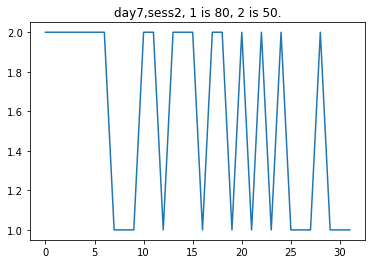

In [95]:
startleafA
plt.plot(startleafA)
plt.title('day7,sess2, 1 is 80, 2 is 50.')

Text(0.5, 1.0, 'day7,sess2, 3 is 80, 4 is 20.')

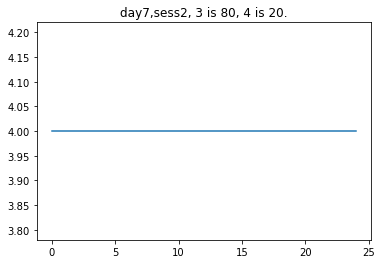

In [96]:
plt.plot(startleafB)
plt.title('day7,sess2, 3 is 80, 4 is 20.')

In [97]:
#ooh my idea is to do a rolling average of how much time he spends at the worst, and find some threshold for when he steops spending time there. 
sess1.worst_stem

8848    C
8849    C
8850    C
8851    C
8852    C
       ..
9143    C
9144    C
9145    C
9146    C
9147    C
Name: worst_stem, Length: 300, dtype: object

In [98]:
worststem=sess1.iloc[0]['worst_stem']

In [99]:
worststem

'C'

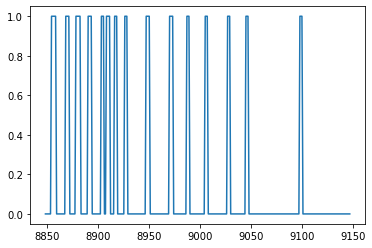

In [100]:
plt.plot(sess1['stem']==worststem)

In [101]:
at_worst=sess1['stem']==worststem

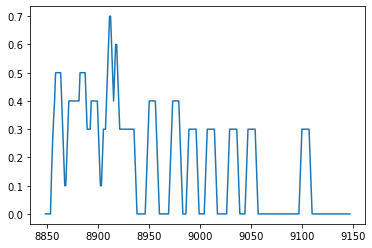

In [102]:
plt.plot(at_worst.rolling(10, min_periods=1).mean())

In [ ]:
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max()-1)):
        sess=day3[day3['session']==sess1]
        cont=sess[sess['trial']==0]['contingency']
        if len(sess)>0:
            if len(sess)>200:
                plt.figure()
                worststem=sess.iloc[0]['worst_stem']
                at_worst=sess['stem']==worststem
                plt.plot(at_worst.rolling(15, min_periods=1).mean())
                plt.title(f'rolling avg, window 15, trials at worst stem\nday{day1} session{sess1} cont={cont}')
                plt.axhline(.3,0,1)
                contin=sess.iloc[0]['contingency']
                plt.figure()
                plt.plot(sess.at_best)
                plt.title(f'day={day1},session={sess1},contin={contin}\n2=best,1=medium,0=worst')
                plt.plot((sess.rew_count_session_total/(sess.rew_count_session_total.max()))*2) #ooh weird added this line and values of rew_count_session are wrong.. 
            


In [ ]:
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max()-1)):
        sess=day3[day3['session']==sess1]
        cont=sess[sess['trial']==0]['contingency']
        if len(sess)>0:
            if len(sess)==300:
#                 plt.figure()
                worststem=sess.iloc[0]['worst_stem']
                at_worst=sess['stem']==worststem
                rolling_avg = (at_worst.rolling(15, min_periods=1).mean())
#                 plt.plot(at_worst.rolling(15, min_periods=1).mean())
#                 plt.title(f'rolling avg, window 15, trials at worst stem\nday{day1} session{sess1} cont={cont}')
#                 plt.axhline(.3,0,1)
                
plt.plot(rolling_avg>.33)


In [ ]:
# sess_len = 300
# lst_indx_abv_30=[i for i, x in enumerate(rolling_avg>.3) if x]
# last_ix_above_30 = lst_indx_abv_30[-1]
# last_prop_above_30 = last_ix_above_30 /sess_len
# stop_going_worst_prop_session.append(last_prop_above_30)

In [141]:
daylst=[]
stop_going_worst_prop_session=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>200:
                worststem=sess.iloc[0]['worst_stem']
                at_worst=sess['stem']==worststem
                daylst.append(day1)
                rolling_avg = (at_worst.rolling(20, min_periods=1).mean())
                sess_len = len(sess)
                lst_indx_abv_30=[i for i, x in enumerate(rolling_avg>.33) if x]
                last_ix_above_30 = lst_indx_abv_30[-1]
                last_prop_above_30 = last_ix_above_30 /sess_len
                stop_going_worst_prop_session.append(last_prop_above_30)

Text(0.5, 1.0, 'with rolling avg over 15 trials, last trial/#trials that rat went to worst stem over 33% of time- \n sessions can now be anything over 200 trials')

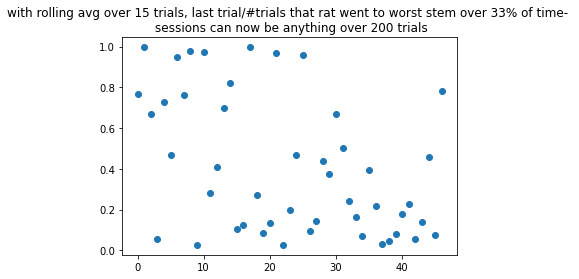

In [142]:
plt.scatter(range(len(stop_going_worst_prop_session)),stop_going_worst_prop_session)
plt.title('with rolling avg over 15 trials, last trial/#trials that rat went to worst stem over 33% of time- \n sessions can now be anything over 200 trials' )

In [ ]:
#one way- whens the last trial the average is above .3? Only 1 number per session. 

In [143]:

data = {'Day':daylst,
        'last_trial':stop_going_worst_prop_session}
  
# Create DataFrame
day_lasttrialworst = pd.DataFrame(data)
day_lasttrialworst

,Day,last_trial
0,1,0.766667
1,1,0.996667
2,1,0.670000
3,1,0.056667
4,2,0.730000
5,2,0.466667
6,2,0.950000
7,3,0.763333
8,3,0.975945
9,3,0.026667


In [145]:

daychng= day_lasttrialworst['Day'].ne(day_lasttrialworst['Day'].shift())
daychng_ix=[i for i, x in enumerate(daychng) if x]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     11.58
Date:                Mon, 20 Dec 2021   Prob (F-statistic):            0.00141
Time:                        14:12:50   Log-Likelihood:                -9.4942
No. Observations:                  47   AIC:                             22.99
Df Residuals:                      45   BIC:                             26.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6657      0.087      7.660      0.0

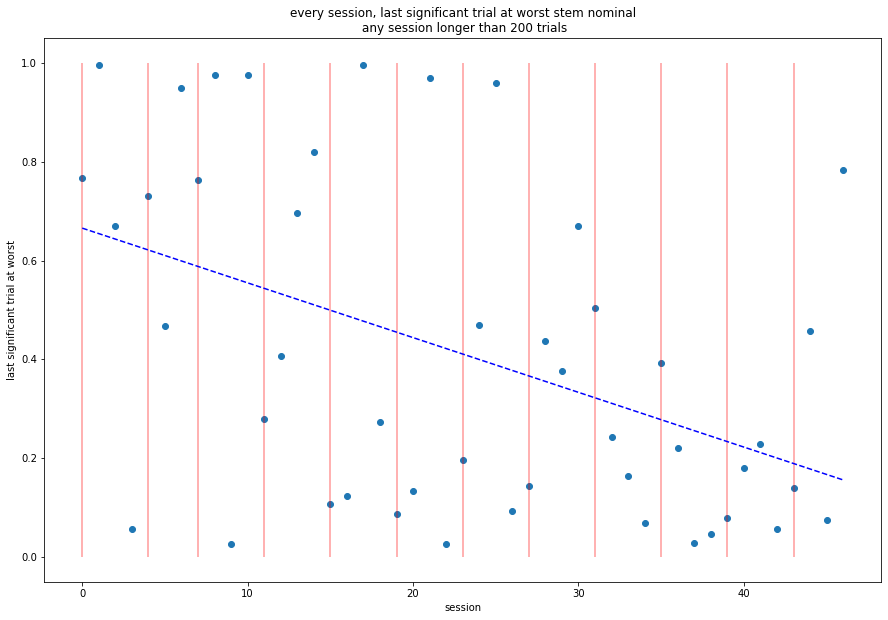

In [146]:
#should just calculate prop trials at worst stems per session. 
x=range(len(stop_going_worst_prop_session))
y=stop_going_worst_prop_session
# plt.vlines((df_choice[df_choice['day_chng']].index-1),.1,.4,colors='red', ls='--',alpha=0.5)
# plt.title('rewards per distanced traveled') #per first contingency')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.figure(figsize=(15,10))
plt.plot(x,p(x),"b--")
plt.xlabel('session')
plt.ylabel('last significant trial at worst')
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
plt.scatter(range(len(stop_going_worst_prop_session)),stop_going_worst_prop_session)
plt.title('every session, last significant trial at worst stem nominal\n any session longer than 200 trials')
plt.vlines(daychng_ix,0,1,color='red',alpha=.4)


print(est2.summary())

0.20472591737687607


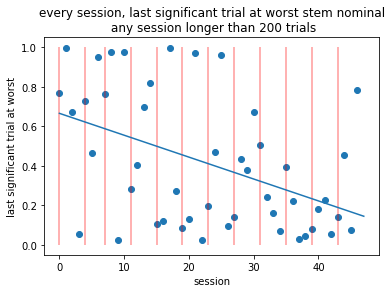

In [147]:
mymodel = np.poly1d(np.polyfit(x, y, 1))

myline = np.linspace(0, len(stop_going_worst_prop_session), 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('every session, last significant trial at worst stem nominal\n any session longer than 200 trials')
plt.vlines(daychng_ix,0,1,color='red',alpha=.4)
plt.xlabel('session')
plt.ylabel('last significant trial at worst')
from sklearn.metrics import r2_score


# mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

In [ ]:

data = {'Day':daylst,
        'last_trial':stop_going_worst_prop_session}
  
# Create DataFrame
day_lasttrialworst = pd.DataFrame(data)

for ix in range(1,day_lasttrialworst.Day.max()+1):
#     print(day_lasttrialworst[day_lasttrialworst.Day==ix].last_trial)
    x = range(len(day_lasttrialworst[day_lasttrialworst.Day==ix]))
    y= day_lasttrialworst[day_lasttrialworst.Day==ix].last_trial
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    
    plt.figure()
    plt.scatter(x,y)
#     ax[ix-1].scatter(x,y)
#     ax[ix-1].plot(x,p(x),"r--")
#     ax[ix-1].set_xlabel(f'day {ix}',fontsize=20)
# print(x,y)

In [ ]:
ix

In [ ]:
ax.iloc[0:3,1]

In [ ]:
at_worst=sess['stem']==worststem
total_atWorst= sum(at_worst)

Text(0, 0.5, 'proportion of trials at worst stem')

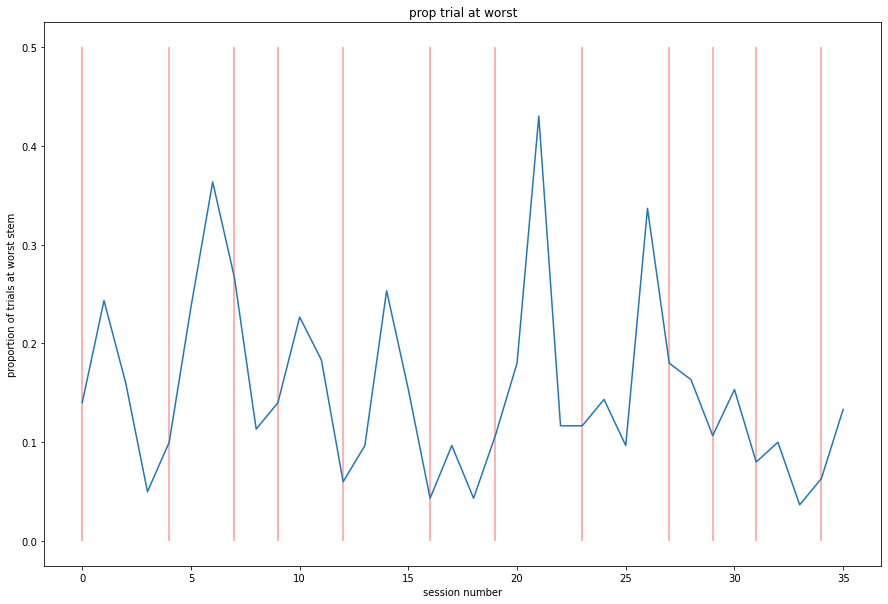

In [148]:
prop_at_worst=[]
contin=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>0:
            if len(sess) == 300:
                cont=sess.iloc[0]['contingency']
                worststem=sess.iloc[0]['worst_stem']
                at_worst=sess['stem']==worststem
                total_atWorst= sum(at_worst)
                prop_at_worst.append(total_atWorst/300)
                contin.append(cont)
plt.figure(figsize=(15,10))
# plt.scatter(range(len(prop_at_worst)), prop_at_worst)
plt.plot(prop_at_worst)


plt.title("prop trial at worst")
plt.vlines(df2[df2.day_switch==1].index,0,.5,color='red',alpha=.4)
plt.xlabel('session number')
plt.ylabel('proportion of trials at worst stem')


In [ ]:
prop_at_worst

Text(0, 0.5, 'proportion of trials at best stem')

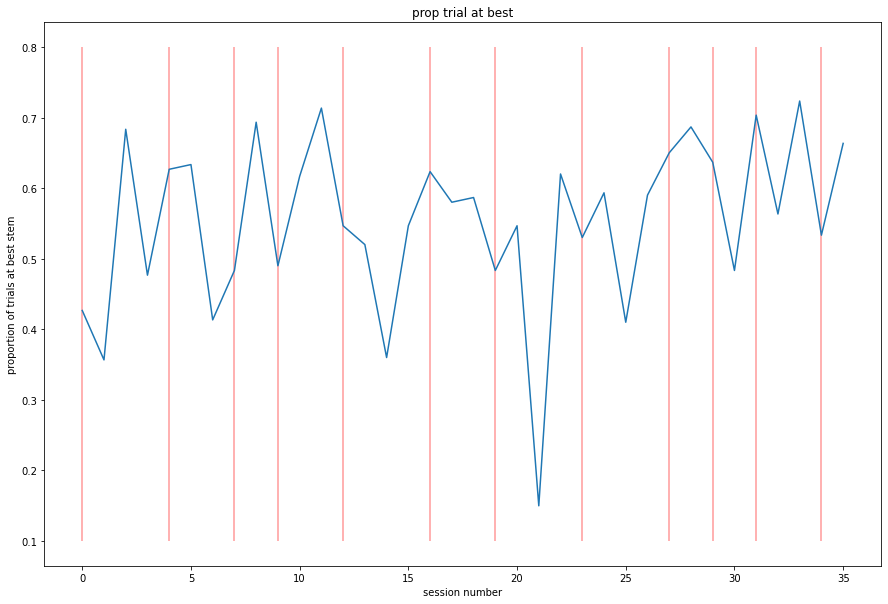

In [149]:
prop_at_Best=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>0:
            if len(sess) == 300:
                beststem=sess.iloc[0]['best_stem']
                at_best=sess['stem']==beststem
                total_atBest= sum(at_best)
                prop_at_Best.append(total_atBest/300)
plt.figure(figsize=(15,10))
# plt.scatter(range(len(prop_at_worst)), prop_at_worst)
plt.plot(prop_at_Best)


plt.title("prop trial at best")
plt.vlines(df2[df2.day_switch==1].index,.1,.8,color='red',alpha=.4)
plt.xlabel('session number')
plt.ylabel('proportion of trials at best stem')



0.20906632983421147


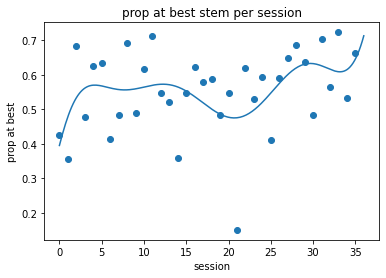

In [181]:
x=range(len(prop_at_Best))
y=prop_at_Best
mymodel = np.poly1d(np.polyfit(x, y, 10))

myline = np.linspace(0, len(prop_at_Best), 200)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.title('prop at best stem per session')
# plt.vlines(daychng_ix,0,1,color='red',alpha=.4)
plt.xlabel('session')
plt.ylabel('prop at best')
from sklearn.metrics import r2_score


# mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))

Text(0, 0.5, 'proportion of trials at Medium stem')

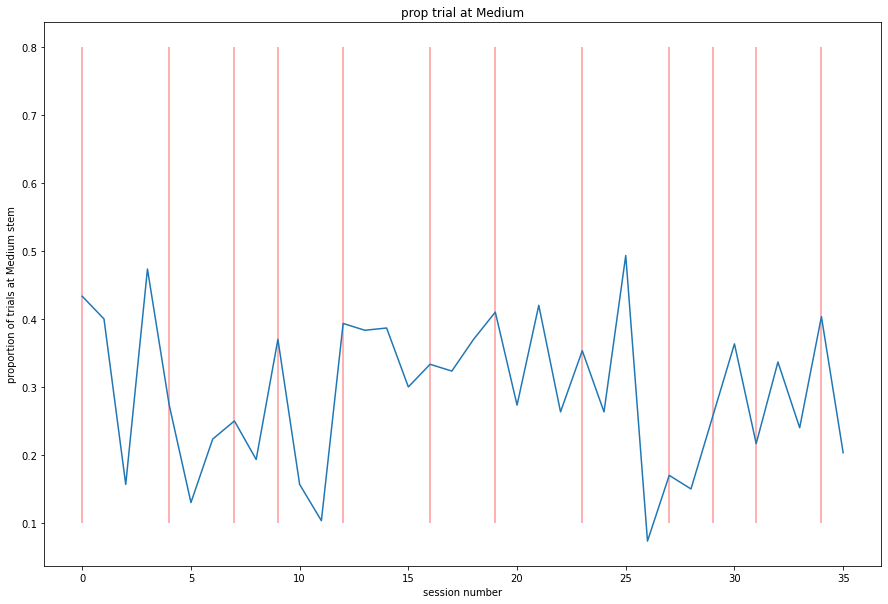

In [155]:
prop_at_Medium=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>0:
            if len(sess) == 300:
                Mediumstem=sess.iloc[0]['medium_stem']
                at_Medium=sess['stem']==Mediumstem
                total_atMedium= sum(at_Medium)
                prop_at_Medium.append(total_atMedium/300)
plt.figure(figsize=(15,10))
# plt.scatter(range(len(prop_at_worst)), prop_at_worst)
plt.plot(prop_at_Medium)


plt.title("prop trial at Medium")
plt.vlines(df2[df2.day_switch==1].index,.1,.8,color='red',alpha=.4)
plt.xlabel('session number')
plt.ylabel('proportion of trials at Medium stem')

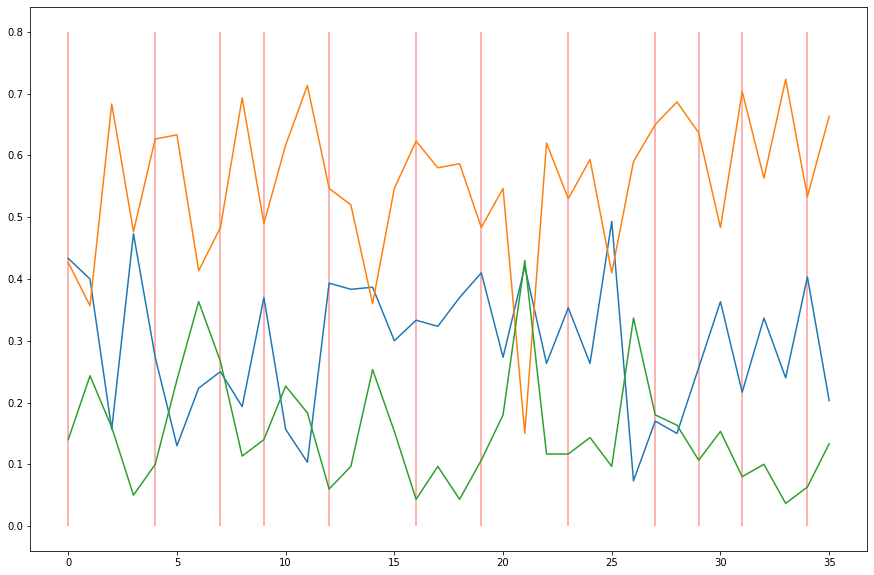

In [156]:
plt.figure(figsize=(15,10))
# plt.scatter(range(len(prop_at_worst)), prop_at_worst)
plt.plot(prop_at_Medium)
plt.plot(prop_at_Best)

plt.plot(prop_at_worst)

plt.vlines(df2[df2.day_switch==1].index,0,.8,color='red',alpha=.4)




In [ ]:
at_worst

In [ ]:
[i for i, x in enumerate(at_worst) if x]

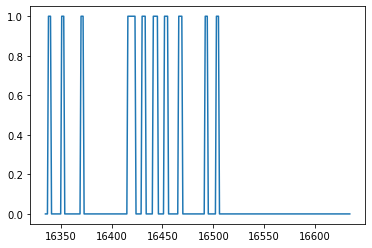

In [157]:
plt.plot(at_worst)

In [159]:
#when does he stop going to the worst stem. use at worst, find last value, which is last trial he went to the worst stem. 
last_trial_at_worst = [i for i, x in enumerate(at_worst) if x][-1]

Text(0, 0.5, 'last trial at worst stem')

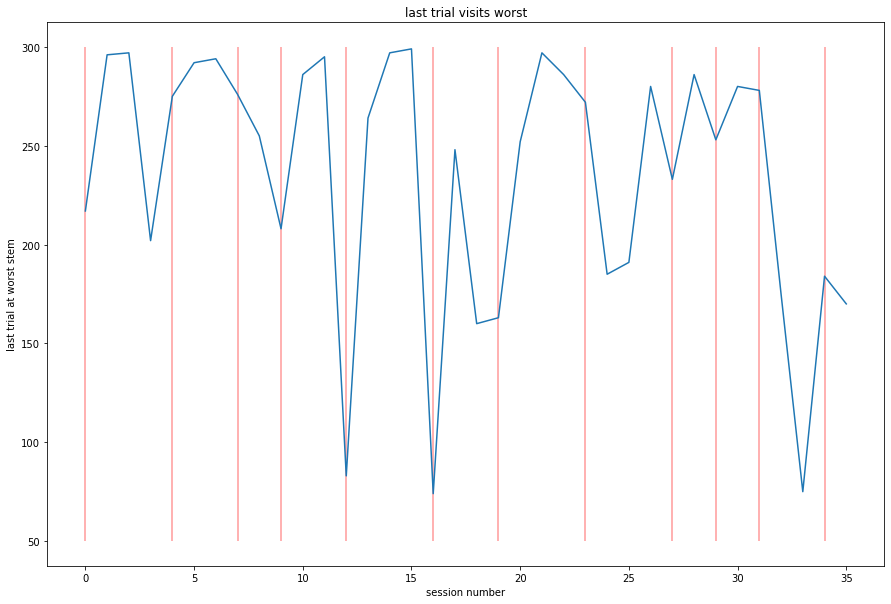

In [160]:
last_trial_at_worst=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>0:
            if len(sess) == 300:
                worststem=sess.iloc[0]['worst_stem']
                at_worst=sess['stem']==worststem
                last_trial_at_worst.append([i for i, x in enumerate(at_worst) if x][-1])
                
plt.figure(figsize=(15,10))
# plt.scatter(range(len(prop_at_worst)), prop_at_worst)
plt.plot(last_trial_at_worst)


plt.title("last trial visits worst")
plt.vlines(df2[df2.day_switch==1].index,50,300,color='red',alpha=.4)
plt.xlabel('session number')
plt.ylabel('last trial at worst stem')



In [ ]:
#what sessions doe she spend more than 25% of time at worst? whats special about that gloabl rew distribution? 
prop_at_worst

In [ ]:
contin

In [ ]:
for ix in range(len(prop_at_worst)):
    if prop_at_worst[ix] > .2:
        prop_at_worst.index()

In [ ]:
indexer

In [ ]:
#bout length questions 
sess

In [ ]:
sess['stem_switch']=True

In [ ]:
sess.stem_switch

In [ ]:
stemswitch = sess.query('stem_switch')

In [ ]:
indexes = stemswitch.index
bout_length=[]
for ix in range(len(indexes)):
    if ix<len(indexes)-1:
        first = indexes[ix]
        second = indexes[ix+1]
        bout_length.append(second-first)

In [ ]:
plt.plot(bout_length)

In [ ]:
indexes[ix]

In [ ]:
len(indexes)

In [ ]:
first

In [ ]:
second

In [ ]:
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(1,((day3.session).max())):
        bout_length=[]
        sess=day3[day3['session']==sess1]
        cont=sess[sess['trial']==0]['contingency']
        maxTrials=sess.trial.max()
        plt.figure()
        plt.title(f'bout lengths over session \nday{day1} session{sess1} cont={cont},trials={maxTrials}')
        if len(sess)>0:
            if len(sess) == 300:
                stemswitch = sess.query('stem_switch')
                indexes = stemswitch.index
                
                for ix in range(len(indexes)):
                    if ix<len(indexes)-1:
                        first = indexes[ix]
                        second = indexes[ix+1]
                        bout_length.append(second-first)
            plt.plot(bout_length)
            

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

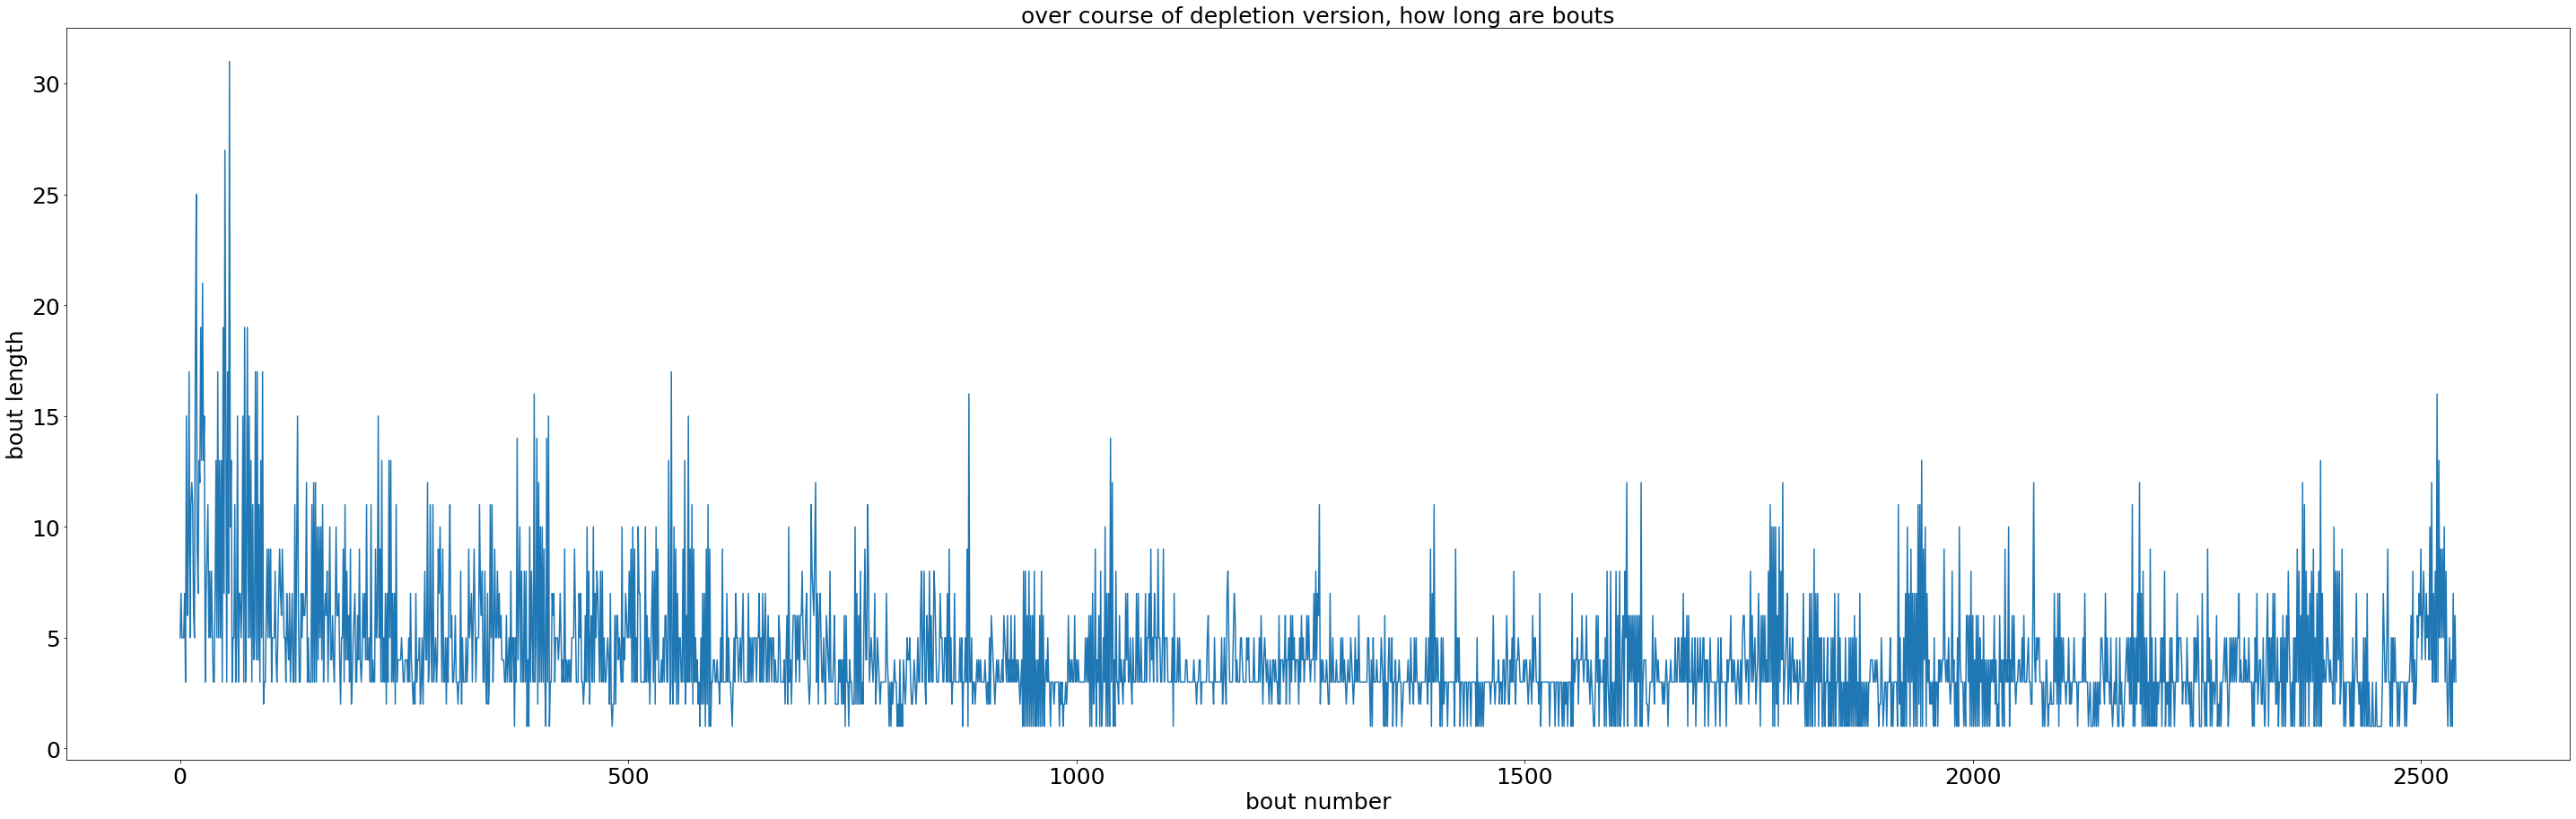

In [162]:
bout_length=[]
plt.figure(figsize=(50,15))
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(1,((day3.session).max())):
        sess=day3[day3['session']==sess1]
#         plt.figure()
        if len(sess)>0:
            if len(sess) == 300:
                stemswitch = sess.query('stem_switch')
                indexes = stemswitch.index
                for ix in range(len(indexes)):
                    if ix<len(indexes)-1:
                        first = indexes[ix]
                        second = indexes[ix+1]
                        bout_length.append(second-first)
                #bout_length.append(0)
                #bout_length.append(35)
plt.plot(bout_length)
plt.title('over course of depletion version, how long are bouts',fontsize=25)
plt.xlabel('bout number',fontsize=25)
plt.ylabel('bout length',fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)


In [163]:
#I want to check how many trials each session has 
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        maxTrials=sess.trial.max()
        print(maxTrials)

nan
299
299
299
299
nan
nan
299
299
299
nan
299
290
299
238
nan
85
213
299
299
299
nan
299
299
299
299
nan
299
299
266
299
nan
299
299
299
299
nan
299
299
299
299
nan
299
299
293
93
249
nan
299
299
273
295
nan
299
299
284
299
nan
299
299
33
249
284


In [164]:
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(1,((day3.session).max())):
        sess=day3[day3['session']==sess1]
        print(day1,sess1)

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4
4 5
5 1
5 2
5 3
5 4
6 1
6 2
6 3
6 4
7 1
7 2
7 3
7 4
8 1
8 2
8 3
8 4
9 1
9 2
9 3
9 4
9 5
10 1
10 2
10 3
10 4
11 1
11 2
11 3
11 4
12 1
12 2
12 3
12 4
12 5


In [ ]:
#when the bout is 1 trial, is it normally the worse stem? If its 3/5 is it the better one? How does this change? 
#average bout length per session- already did in previous analysis. Now should do the reward / distance traveled

In [ ]:
#how long are his bouts at the better ones, how long are the bouts at the worst one? 

In [165]:
sess
#total num rewards
#total num stem switches. = 4
#Total number trials - total num stem switches =2 
trials = sess.trial.max()
num_stem_switch=len(sess.query('stem_switch'))
non_stem_switch = trials - num_stem_switch 
dist = (num_stem_switch*4) + (non_stem_switch*2)
rew = sess.reward.sum()
rew

130

In [166]:
len(sess.query('stem_switch'))

60

In [ ]:
trials

In [ ]:
dist

In [ ]:
non_stem_switch

In [167]:
rew_per_dist=[]
rew1=[]
dist1=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>0:
            if len(sess)==300:
                trials = sess.trial.max()
                num_stem_switch=len(sess.query('stem_switch'))
                non_stem_switch = trials - num_stem_switch 
                dist = (num_stem_switch*4) + (non_stem_switch*2)
                rew=sess.reward.sum()
                rew1.append(rew)
                dist1.append(dist)
                rew_per_dist.append(rew / dist)

Text(0, 0.5, 'number of rewards / distance traveled')

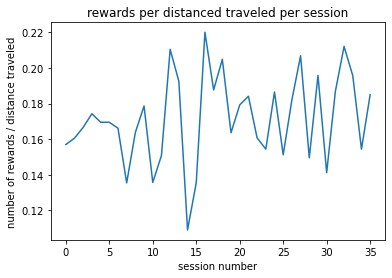

In [168]:
plt.plot(rew_per_dist)
plt.title('rewards per distanced traveled per session')
plt.xlabel('session number')
plt.ylabel('number of rewards / distance traveled')
# plt.vlines(df2[df2.day_switch==1].index,.1,.25,color='red',alpha=.4)



Text(0, 0.5, 'number of rewards')

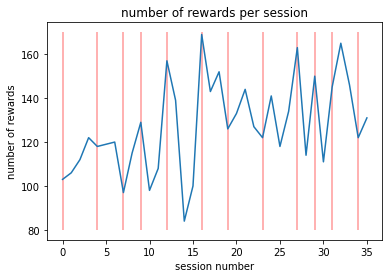

In [169]:
plt.plot(rew1)
plt.title('number of rewards per session')
plt.vlines(df2[df2.day_switch==1].index,80,170,color='red',alpha=.4)
plt.xlabel('session number')
plt.ylabel('number of rewards')

Text(0, 0.5, 'distanced traveled in segments')

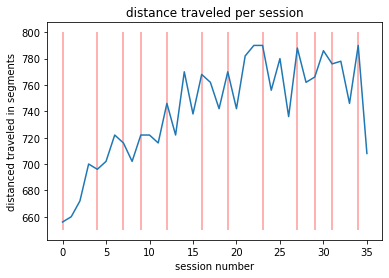

In [170]:
plt.plot(dist1)
plt.vlines(df2[df2.day_switch==1].index,650,800,color='red',alpha=.4)
plt.title('distance traveled per session')

plt.xlabel('session number')
plt.ylabel('distanced traveled in segments')


In [171]:
#could look at only the same rew dist
contins = df[df['trial']==0]['contingency'].unique()

Text(0, 0.5, 'number of sessions with dist')

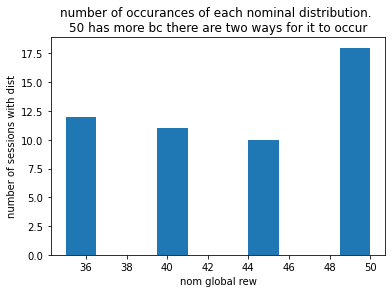

In [172]:
means=[]
for ix in range(len(contins)):
    indiv = str(contins[ix])
    cont = [indiv[i:i+2] for i in range(0, len(indiv), 2)]
    cont = [int(i) for i in cont]
    means.append(statistics.mean(cont))
plt.hist(means)
plt.title('number of occurances of each nominal distribution. \n50 has more bc there are two ways for it to occur')
plt.xlabel('nom global rew')
plt.ylabel('number of sessions with dist')

In [ ]:
ix=0

indiv = str(contins[ix])
cont = [indiv[i:i+2] for i in range(0, len(indiv), 2)]
cont = [int(i) for i in cont]
statistics.mean(cont)

In [ ]:
cont

In [ ]:
statistics.mean(cont)

In [ ]:
df[df.trial==0]

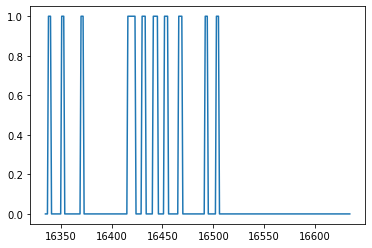

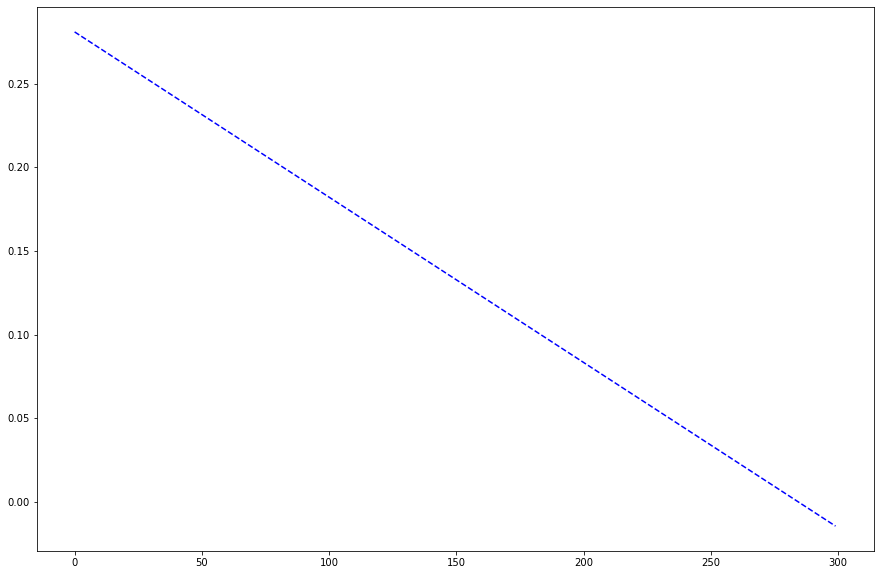

In [173]:
plt.plot(at_worst)
x=range(len(at_worst))
y=at_worst 
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.figure(figsize=(15,10))
plt.plot(x,p(x),"b--")
# plt.xlabel('session')
# plt.ylabel('last significant trial at worst')
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
# plt.scatter(range(len(stop_going_worst_prop_session)),stop_going_worst_prop_session)
# plt.title('every session, last significant trial at worst stem nominal\n any session longer than 200 trials')
# plt.vlines(daychng_ix,0,1,color='red',alph

In [ ]:
yint=[]
slope=[]
for day1 in range(1,(df.day).max()):
    day3=df[df['day']==day1]
    for sess1 in range(((day3.session).max())):
        sess=day3[day3['session']==sess1]
        if len(sess)>200:
                worststem=sess.iloc[0]['worst_stem']
                at_worst=sess['stem']==worststem
                plt.figure()
                x=range(len(at_worst))
                y=at_worst 
                plt.scatter(x,y)
                z = np.polyfit(x, y, 1)
                p = np.poly1d(z)
                plt.plot(x,p(x),"b--")
                plt.title('for every trial, 0 at better, 1 at worst')
                # plt.xlabel('session')
                # plt.ylabel('last significant trial at worst')
                X2 = sm.add_constant(x)
                est = sm.OLS(y, X2)
                est2 = est.fit()
                yint.append(est2.params[0])
                slope.append(est2.params[1])

In [ ]:
est2.params

Text(0, 0.5, 'y intercept of line fitting at worst')

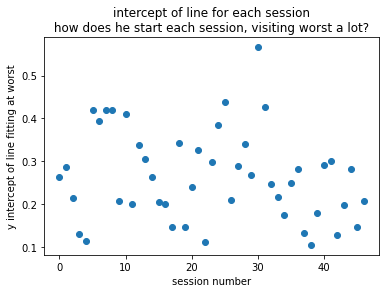

In [175]:
plt.scatter(range(len(yint)), yint)
plt.title('intercept of line for each session\n how does he start each session, visiting worst a lot? ')
plt.xlabel('session number')
plt.ylabel('y intercept of line fitting at worst')

Text(0, 0.5, 'slope of line fitting at worst')

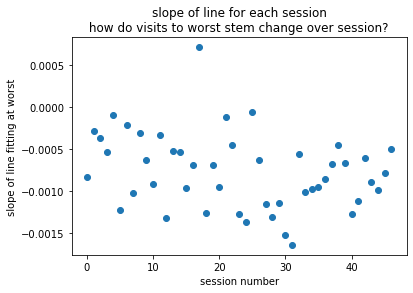

In [176]:
# plt.plot(slope)
plt.scatter(range(len(slope)), slope)
plt.title('slope of line for each session\n how do visits to worst stem change over session? ')
plt.xlabel('session number')
plt.ylabel('slope of line fitting at worst')